In [ ]:
#new
# use RESIDENTIAL ENERGY CONSUMPTION SURVEY (RECS) from 2009 as the 2015 version lacks 
#consumption and expenditure data.

Introduction 

1)(fact check)Residential energy consumption accounts for 40% of annual US energy consumption
2) (reword) benefits of understanding the data include a) allow homeowners to make more informed decisions to lower their energy bills b)help utilities maximize efficiency/incentive programs, c) allow governments or NGOs to better forecast energy demand and address climate concerns.



In [1]:
!ls residential-energy-consumption-survey

public_layout.csv             recs2009_public_codebook.xlsx
recs2009_public.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 1. Get the data

#### Import the Layout file 
Layout consists a description of each label name in the RECS dataset

In [3]:
layout = pd.read_csv('./residential-energy-consumption-survey/public_layout.csv')

In [4]:
!ls residential-energy-consumption-survey

public_layout.csv             recs2009_public_codebook.xlsx
recs2009_public.csv


In [5]:
#look at the layout of the RECS file 
layout

Variable Name                                     Variable Label  \
0                 DOEID              Unique identifier for each respondent   
1               REGIONC                                      Census Region   
2              DIVISION                                    Census Division   
3     REPORTABLE_DOMAIN             Reportable states and groups of states   
4               TYPEHUQ                               Type of housing unit   
5               NWEIGHT                                Final sample weight   
6                 HDD65  Heating degree days in 2009, base temperature 65F   
7                 CDD65  Cooling degree days in 2009, base temperature 65F   
8               HDD30YR  Heating degree days, 30-year average 1981-2010...   
9               CDD30YR  Cooling degree days, 30-year average 1981-2010...   
10   Climate_Region_Pub  Building America Climate Region (collapsed for...   
11             AIA_Zone  AIA Climate Zone, based on average temperature...   
12           METROMICRO  Housing unit in Census Metropolitan Statistica...   
13                   UR  Housing unit classified as urban or rural by C...   
14             KOWNRENT  Housing unit is owned, rented, or occupied wit...   
15             CONDCOOP    Housing unit part of condominium or cooperative   
16             YEARMADE                        Year housing unit was built   
17        YEARMADERANGE             Year range when housing unit was built   
18         OCCUPYYRANGE                 Year range when household moved in   
19           CONVERSION              Converted 2-4 unit apartment building   
20             ORIG1FAM  Converted 2-4 unit apartment building was orig...   
21             LOOKLIKE  Converted 2-4 unit apartment building more lik...   
22              NUMFLRS   Number of floors in a 5+ unit apartment building   
23              NUMAPTS  Number of apartment units in a 5+ unit apartme...   
24             WALLTYPE                        Major outside wall material   
25             ROOFTYPE                             Major roofing material   
26               STUDIO                                   Studio apartment   
27             NAPTFLRS  Number of floors in an apartment (Number of le...   
28              STORIES          Number of stories in a single-family home   
29             TYPEHUQ4                          Addition to a mobile home   
..                  ...                                                ...   
901           DOLLARKER     Total cost of Kerosene, in whole dollars, 2009   
902           DOLKERSPH  Cost of Kerosene for space heating, in whole d...   
903           DOLKERWTH  Cost of Kerosene for water heating, in whole d...   
904           DOLKEROTH  Cost of Kerosene for other purposes (all end-u...   
905             BTUWOOD  Total Wood usage, in thousand BTU, 2009 (Wood ...   
906             CORDSWD  Total Wood usage, in cords, 2009 (Wood consump...   
907            TOTALBTU                 Total usage, in thousand BTU, 2009   
908         TOTALBTUSPH  Total usage for space heating, in thousand BTU...   
909         TOTALBTUCOL  Total usage for air conditioning, in thousand ...   
910         TOTALBTUWTH  Total usage for water heating, in thousand BTU...   
911         TOTALBTURFG  Total usage for refrigerators, in thousand BTU...   
912         TOTALBTUOTH  Total usage for appliances, electronics, light...   
913            TOTALDOL                 Total cost, in whole dollars, 2009   
914         TOTALDOLSPH  Total cost for space heating, in whole dollars...   
915         TOTALDOLCOL  Total cost for air conditioning, in whole doll...   
916         TOTALDOLWTH  Total cost for water heating, in whole dollars...   
917         TOTALDOLRFG  Total cost for refrigerators, in whole dollars...   
918         TOTALDOLOTH  Total cost for appliances, electronics, lighti...   
919             KAVALEL  Electricity end uses included in Energy Suppli...   
920            PERIODEL  Number 

In [162]:
# use to pull out groupings of variable names

parse = layout[layout['Variable Label'].str.contains('region')]
parse

Empty DataFrame
Columns: [Variable Name, Variable Label, Variable Order in File, Variable Type, Length]
Index: []

In [7]:
parse.iloc[:,:2].values

array([['ZTEMPNITE', 'Imputation flag for TEMPNITE'],
       ['ZTEMPNITEAC', 'Imputation flag for TEMPNITEAC']], dtype=object)

In [8]:
parse.iloc[:,:1].values

array([['ZTEMPNITE'],
       ['ZTEMPNITEAC']], dtype=object)

#### Import the Codebook file

Codebook describes how responses are coded in the RECS survey and in the RECS dataset

In [9]:
codebook = pd.read_excel('./residential-energy-consumption-survey/recs2009_public_codebook.xlsx')

In [10]:
codebook.head()

2009 RECS Variable and Response Codebook  \
0                            Variable Name   
1                                      NaN   
2                                    DOEID   
3                                  REGIONC   
4                                 DIVISION   

                              Unnamed: 1                     Unnamed: 2  \
0                   Variable Description      Response Codes and Labels   
1                                    NaN                            NaN   
2  Unique identifier for each respondent                  00001 - 12083   
3                          Census Region                     1\n2\n3\n4   
4                        Census Division  1\n2\n3\n4\n5\n6\n7\n8\n9\n10   

                                          Unnamed: 3  \
0                                                NaN   
1                                                NaN   
2              Unique identifier for each respondent   
3  Northeast Census Region\nMidwest Census Region...   
4  New England Census Division (CT, MA, ME, NH, R...   

                                         Unnamed: 4   Unnamed: 5 Unnamed: 6  \
0  Variables in End-Use Models (see note at bottom)          NaN        NaN   
1                                       Electricity  Natural Gas    Propane   
2                                               NaN          NaN        NaN   
3                                               NaN          NaN        NaN   
4                                               NaN          NaN        NaN   

  Unnamed: 7 Unnamed: 8  
0        NaN        NaN  
1   Fuel Oil   Kerosene  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [489]:
# look at columns of codebook based on feature name

review_cb = codebook[codebook['2009 RECS Variable and Response Codebook'].str.contains("USEMOISTURE")==True]
pd.set_option('display.max_colwidth', -1)
review_cb.transpose()

473  \
2009 RECS Variable and Response Codebook  USEMOISTURE                                                                                        
Unnamed: 1                                Number of months humidifier used in 2009                                                           
Unnamed: 2                                1\n2\n3\n4\n5\n-2                                                                                  
Unnamed: 3                                1 to 3 months\n4 to 6 months\n7 to 9 months\n10 to 11 months\nTurned on all year\nNot Applicable   
Unnamed: 4                                OTH_B                                                                                              
Unnamed: 5                                NaN                                                                                                
Unnamed: 6                                NaN                                                                                                
Unnamed: 7                                NaN                                                                                                
Unnamed: 8                                NaN                                                                                                

                                                                      504  
2009 RECS Variable and Response Codebook  ZUSEMOISTURE                     
Unnamed: 1                                Imputation flag for USEMOISTURE  
Unnamed: 2                                0\n1                             
Unnamed: 3                                Not Imputed\nImputed             
Unnamed: 4                                NaN                              
Unnamed: 5                                NaN                              
Unnamed: 6                                NaN                              
Unnamed: 7                                NaN                              
Unnamed: 8                                NaN

#### Import the RECS dataset

In [12]:
RECS = pd.read_csv('./residential-energy-consumption-survey/recs2009_public.csv')

In [13]:
# look at the shape of RECS; look at the first five observations
print RECS.shape

RECS.head()

(12083, 931)


DOEID  REGIONC  DIVISION  REPORTABLE_DOMAIN  TYPEHUQ       NWEIGHT  HDD65  \
0  1      2        4         12                 2        2471.679705   4742    
1  2      4        10        26                 2        8599.172010   2662    
2  3      1        1         1                  5        8969.915921   6233    
3  4      2        3         7                  2        18003.639600  6034    
4  5      1        1         1                  3        5999.605242   5388    

   CDD65  HDD30YR  CDD30YR    ...     SCALEEL  KAVALNG PERIODNG SCALENG  \
0  1080   4953     1271       ...     0       -2       -2       -2        
1  199    2688     143        ...     0        1        1        0        
2  505    5741     829        ...     0        3        5        3        
3  672    5781     868        ...     3        3        5        3        
4  702    5313     797        ...     0        1        1        0        

   PERIODLP  SCALELP  PERIODFO  SCALEFO  PERIODKR  SCALEKER  
0 -2        -2       -2        -2       -2        -2         
1 -2        -2       -2        -2       -2        -2         
2 -2        -2       -2        -2       -2        -2         
3 -2        -2       -2        -2       -2        -2         
4 -2        -2       -2        -2       -2        -2         

[5 rows x 931 columns]

In [14]:
# Look at the number of each data type
print RECS.dtypes.value_counts()

int64      878
float64    51 
object     2  
dtype: int64


In [15]:
print RECS.columns.values


['DOEID' 'REGIONC' 'DIVISION' 'REPORTABLE_DOMAIN' 'TYPEHUQ' 'NWEIGHT'
 'HDD65' 'CDD65' 'HDD30YR' 'CDD30YR' 'Climate_Region_Pub' 'AIA_Zone'
 'METROMICRO' 'UR' 'KOWNRENT' 'CONDCOOP' 'YEARMADE' 'YEARMADERANGE'
 'OCCUPYYRANGE' 'CONVERSION' 'ORIG1FAM' 'LOOKLIKE' 'NUMFLRS' 'NUMAPTS'
 'WALLTYPE' 'ROOFTYPE' 'STUDIO' 'NAPTFLRS' 'STORIES' 'TYPEHUQ4' 'BEDROOMS'
 'NCOMBATH' 'NHAFBATH' 'OTHROOMS' 'TOTROOMS' 'CELLAR' 'CRAWL' 'CONCRETE'
 'BASEFIN' 'FINBASERMS' 'BASEHEAT' 'BASEHT2' 'PCTBSTHT' 'BASECOOL'
 'BASECL2' 'PCTBSTCL' 'BASEUSE' 'ATTIC' 'ATTICFIN' 'FINATTRMS' 'ATTCHEAT'
 'ATTCHT2' 'PCTATTHT' 'ATTCCOOL' 'ATTCCL2' 'PCTATTCL' 'ATTICUSE' 'PRKGPLC1'
 'SIZEOFGARAGE' 'GARGLOC' 'GARGHEAT' 'GARGCOOL' 'PRKGPLC2' 'SIZEOFDETACH'
 'OUTLET' 'ZKOWNRENT' 'ZCONDCOOP' 'ZYEARMADE' 'ZYEARMADERANGE'
 'ZOCCUPYYRANGE' 'ZCONVERSION' 'ZORIG1FAM' 'ZLOOKLIKE' 'ZNUMFLRS'
 'ZNUMAPTS' 'ZWALLTYPE' 'ZROOFTYPE' 'ZSTUDIO' 'ZNAPTFLRS' 'ZSTORIES'
 'ZTYPEHUQ4' 'ZBEDROOMS' 'ZNCOMBATH' 'ZNHAFBATH' 'ZOTHROOMS' 'ZCELLAR'
 'ZCRAWL' 'ZCO

Understand the survey

The 2009 Residential Energy Consumption Survey (RECS) dataset contains 12,083 household interviews collected between 02/2010-07/2010, comprising of in-person interviews, rental agent surveys, and energy supplier surveys. The approximate timeline of the 2009 RECS process is be 2009-2012. This is the most recent completed cycle of RECS data. (The 2015 RECS dataset does not have consumption and expenditure estimates.)

RECS captures what devices consume energy, how households consume them, and how much energy they consume. It captured actual use in 16 states and produces estimates for group of the remaining states.  


# Explore the data

In [16]:
# show all values without cutting any out 
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [17]:
# look at percentage of null values
nulls = pd.DataFrame(zip(RECS.columns,RECS.dtypes,((RECS.isnull().sum())/len(RECS)).values))

print_full(nulls)

                      0        1         2
0    DOEID               int64    0.000000
1    REGIONC             int64    0.000000
2    DIVISION            int64    0.000000
3    REPORTABLE_DOMAIN   int64    0.000000
4    TYPEHUQ             int64    0.000000
5    NWEIGHT             float64  0.000000
6    HDD65               int64    0.000000
7    CDD65               int64    0.000000
8    HDD30YR             int64    0.000000
9    CDD30YR             int64    0.000000
10   Climate_Region_Pub  int64    0.000000
11   AIA_Zone            int64    0.000000
12   METROMICRO          object   0.000000
13   UR                  object   0.000000
14   KOWNRENT            int64    0.000000
15   CONDCOOP            int64    0.000000
16   YEARMADE            int64    0.000000
17   YEARMADERANGE       int64    0.000000
18   OCCUPYYRANGE        int64    0.000000
19   CONVERSION          int64    0.000000
20   ORIG1FAM            int64    0.000000
21   LOOKLIKE            int64    0.000000
22   NUMFLR

In [18]:
# look at object type columns
RECS['UR'].value_counts()

U    9656
R    2427
Name: UR, dtype: int64

In [19]:
RECS.shape

(12083, 931)

## a note about imputation
From the EIA's methodology report for 2015 RECS (assuming this methodology is similar for 2009) - 
The hot-deck imputation method was used for the 2015 RECS. In this method, a recipient case that has a
missing value for the item being imputed is matched with a similar donor case that has a response. The
donor’s value for that item is used to replace the missing value for the recipient case. After imputation,
final editing reviews ensured questionnaire skip patterns were performed correctly.
Implementations of the hot-deck method differ on both how to group recipients and potential donors,
and how to select the donor for a given recipient. The 2015 RECS used the Predictive Mean
Neighborhood (PMN) hot-deck method for household square footage and the Cyclical Tree-Based Hot
Deck (CTB) hot-deck method for the remainder of the household survey variables. The PMN method
uses regression models to group recipients and potential donors, and chooses a donor with a statistical
nearest neighbor approach. The CTB method uses classification trees to group recipients and potential
donors, and uses a weighted sequential hot deck imputation procedure
in which weights are used to
match chosen donors to recipients.

In [20]:
'''
look at the columns where ZTOTSQFT has an imputation flag (denoted by '1') and its corresponding TOTCSQFT value to 
see if I can tell how the columns are imputed. 

''' 
RECS[['TOTCSQFT', 'ZTOTSQFT']].loc[RECS[ 'ZTOTSQFT'] == 1].sample(5)

TOTCSQFT  ZTOTSQFT
2581   1892      1       
8694   2160      1       
11378  861       1       
9970   0         1       
2983   2923      1

In [21]:
# look at correlations
RECS.corr()

DOEID   REGIONC  DIVISION  REPORTABLE_DOMAIN   TYPEHUQ  \
DOEID               1.000000 -0.000372 -0.002316 -0.004707          -0.012120   
REGIONC            -0.000372  1.000000  0.952803  0.969586          -0.056385   
DIVISION           -0.002316  0.952803  1.000000  0.979672          -0.025788   
REPORTABLE_DOMAIN  -0.004707  0.969586  0.979672  1.000000          -0.049255   
TYPEHUQ            -0.012120 -0.056385 -0.025788 -0.049255           1.000000   
NWEIGHT             0.017495 -0.005836 -0.049847 -0.056551           0.002530   
HDD65               0.004473 -0.587197 -0.563764 -0.630987          -0.035852   
CDD65              -0.013278  0.366785  0.290634  0.404943          -0.018070   
HDD30YR             0.004489 -0.601890 -0.573126 -0.642797          -0.036604   
CDD30YR            -0.014123  0.305674  0.220857  0.341611          -0.016575   
Climate_Region_Pub  0.016347  0.256589  0.245770  0.301593           0.018459   
AIA_Zone           -0.000498  0.561632  0.526094  0.613876           0.003091   
KOWNRENT           -0.012204  0.016180  0.037074  0.026150           0.602941   
CONDCOOP            0.001847  0.000067 -0.004281 -0.007183           0.292407   
YEARMADE           -0.009031  0.250232  0.197601  0.239461          -0.055570   
YEARMADERANGE      -0.009201  0.218807  0.164658  0.206892          -0.037292   
OCCUPYYRANGE        0.004535  0.086161  0.075332  0.085864           0.274651   
CONVERSION          0.000366 -0.086475 -0.066639 -0.079411           0.320896   
ORIG1FAM           -0.002493 -0.096033 -0.082878 -0.094301           0.147366   
LOOKLIKE           -0.006394 -0.082689 -0.070781 -0.081055           0.128884   
NUMFLRS            -0.003503 -0.069954 -0.044652 -0.065971           0.662119   
NUMAPTS            -0.003560 -0.049054 -0.032474 -0.049587           0.429177   
WALLTYPE            0.000304  0.185968  0.161836  0.165895          -0.076608   
ROOFTYPE            0.004255 -0.080776 -0.097310 -0.085555          -0.749750   
STUDIO             -0.015444 -0.052742 -0.024321 -0.044472           0.930909   
NAPTFLRS           -0.012036 -0.059455 -0.031063 -0.051168           0.930087   
STORIES             0.020642 -0.066364 -0.082964 -0.086600          -0.709549   
TYPEHUQ4           -0.000074  0.052066  0.035860  0.051668          -0.295707   
BEDROOMS            0.018044 -0.006206 -0.026601 -0.017667          -0.564779   
NCOMBATH            0.003809  0.149297  0.114468  0.134564          -0.332670   
...                      ...       ...       ...       ...                ...   
DOLLARKER           0.006227 -0.070919 -0.065905 -0.072060          -0.062062   
DOLKERSPH           0.006975 -0.063481 -0.058794 -0.064420          -0.060718   
DOLKERWTH          -0.000587 -0.022936 -0.021647 -0.024127          -0.008119   
DOLKEROTH          -0.000008 -0.026682 -0.025154 -0.026817          -0.016204   
BTUWOOD             0.008904 -0.040713 -0.040726 -0.043268          -0.119633   
CORDSWD             0.008904 -0.040713 -0.040726 -0.043268          -0.119633   
TOTALBTU            0.011597 -0.294493 -0.285561 -0.309175          -0.361188   
TOTALBTUSPH         0.013083 -0.444266 -0.419097 -0.467637          -0.193278   
TOTALBTUCOL        -0.017777  0.184924  0.114998  0.204888          -0.207644   
TOTALBTUWTH         0.019314 -0.089695 -0.064586 -0.092042          -0.221178   
TOTALBTURFG        -0.001106  0.010734 -0.004438  0.009292          -0.266198   
TOTALBTUOTH         0.002904 -0.030677 -0.036594 -0.035776          -0.369199   
TOTALDOL            0.004369 -0.267000 -0.267076 -0.264679          -0.357408   
TOTALDOLSPH         0.008396 -0.514182 -0.485827 -0.526763          -0.168214   
TOTALDOLCOL        -0.019057  0.175475  0.116143  0.197794          -0.189620   
TOTALDOLWTH         0.011520 -0.164160 -0.172031 -0.160606          -0.213589   
TOTALDOLRFG         0.002655 -0.099252 -0.076924 -0.092182          -0.177753   
TOTALDOLOTH         0.007127 -0.112517 -0.107145 -0.11

In [22]:
RECS.describe

<bound method DataFrame.describe of        DOEID  REGIONC  DIVISION  REPORTABLE_DOMAIN  TYPEHUQ       NWEIGHT  \
0      1      2        4         12                 2        2471.679705    
1      2      4        10        26                 2        8599.172010    
2      3      1        1         1                  5        8969.915921    
3      4      2        3         7                  2        18003.639600   
4      5      1        1         1                  3        5999.605242    
5      6      2        4         10                 2        4232.486778    
6      7      1        2         3                  2        7862.341967    
7      8      3        5         17                 2        6297.038285    
8      9      1        2         5                  3        12156.721510   
9      10     2        4         12                 2        3242.224473    
10     11     4        10        26                 4        8812.434127    
11     12     1        2         4      

Text(0.5,1,u'histogram of sample weight distribution')

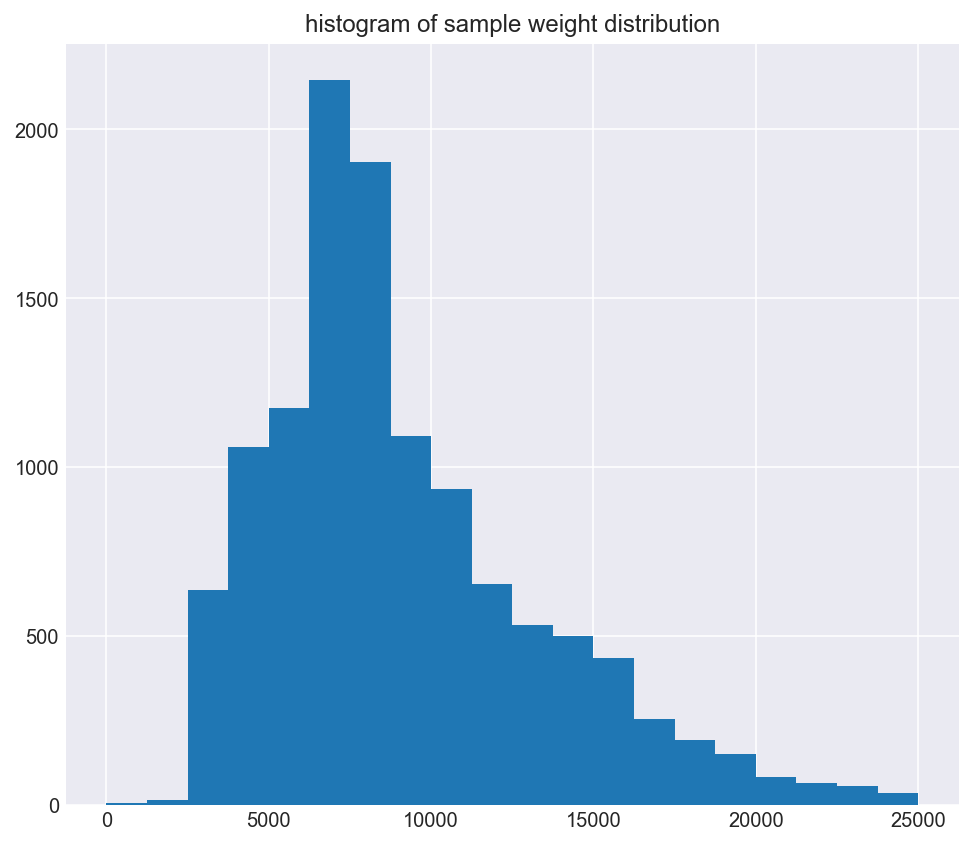

In [204]:
'''
The variable NWEIGHT in the data file represents the final sampling weight, accounting for different probabilities of
selection and rates of response, and being adjusted for the Census Bureau housing unit estimates. NWEIGHT is the number of households in the population that the observation
represents. For example, if NWEIGHT for a household is 10,000, that household represents itself and 9,999 other 
non-sampled households. (EIA's estimation documentation: https://www.eia.gov/consumption/residential/methodology/2009/pdf/using-microdata-022613.pdf)
'''

RECS['NWEIGHT'].value_counts()
plt.subplots(figsize=(8,7))
plt.hist(RECS['NWEIGHT'], bins=20, range=(0,25000))  # plt.hist passes it's arguments to np.histogram
plt.title("histogram of sample weight distribution")




## Demographic, regional, income, education, race, ownership data 

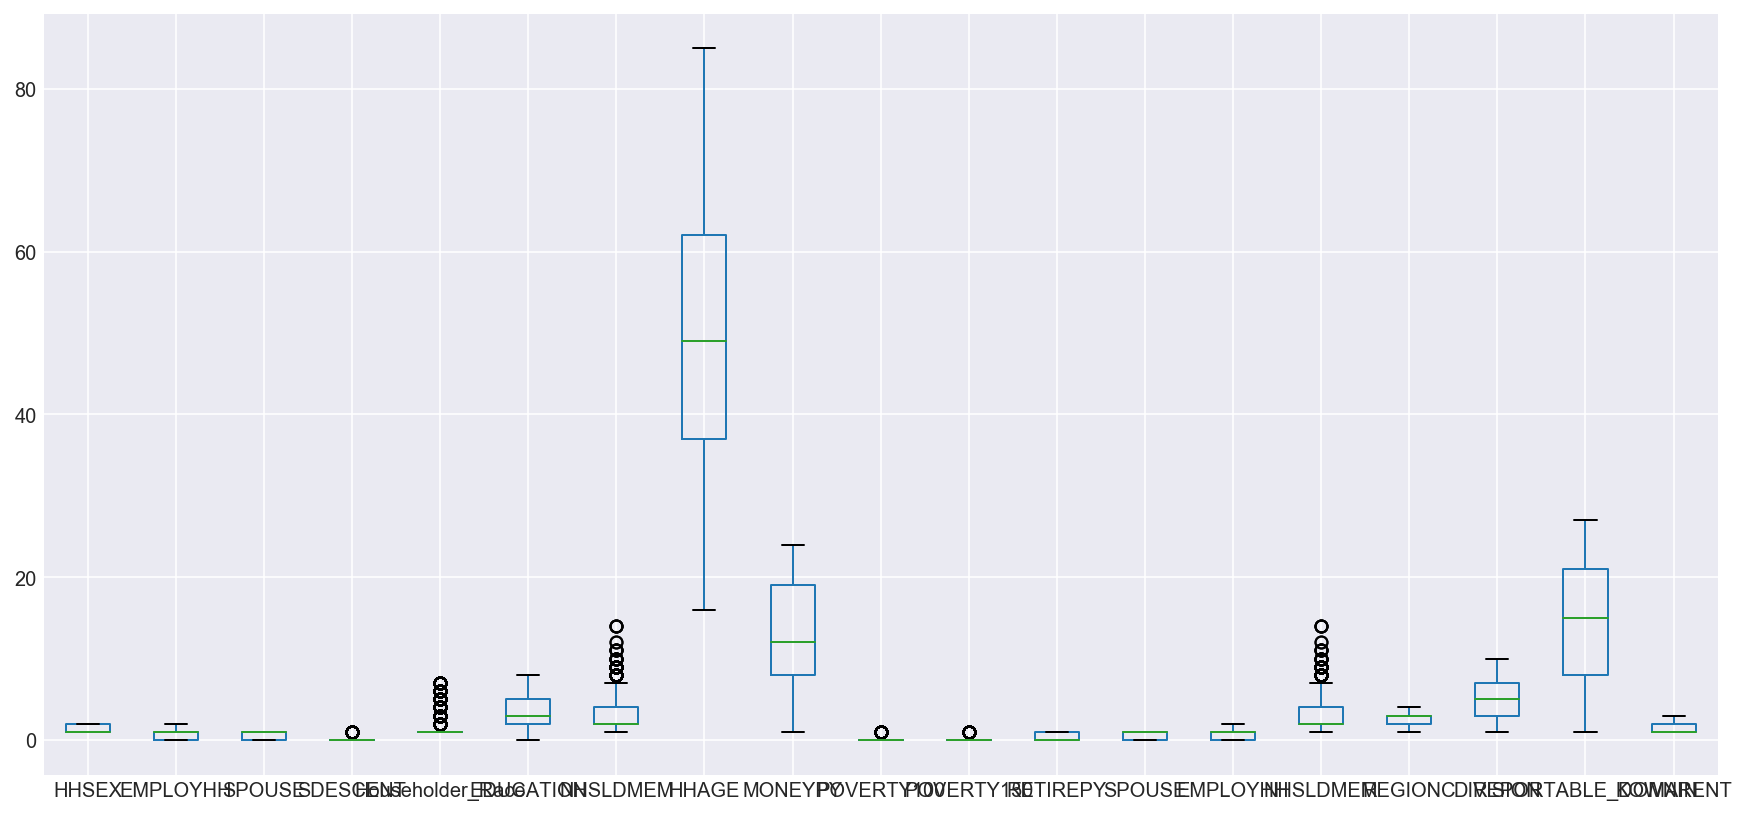

In [206]:
# build some box plots
control = RECS[['HHSEX', 'EMPLOYHH', 'SPOUSE', 'SDESCENT', 'Householder_Race', 'EDUCATION', 'NHSLDMEM', 
     'HHAGE', 'MONEYPY', 'POVERTY100', 'POVERTY150', 'RETIREPY','SPOUSE','EMPLOYHH','NHSLDMEM','REGIONC','DIVISION',
     'REPORTABLE_DOMAIN','KOWNRENT' ]]

control.plot(kind='box', figsize=(15,7))

In [207]:
control_stand = (control -control.mean())/control.std()
control_stand.head()

HHSEX  EMPLOYHH    SPOUSE  SDESCENT  Householder_Race  EDUCATION  \
0 -0.942125  0.416833  0.826325 -0.40101  -0.387387          0.955336    
1 -0.942125  0.416833 -1.210078 -0.40101   0.488674         -0.826408    
2 -0.942125  0.416833 -1.210078 -0.40101  -0.387387          1.549250    
3 -0.942125 -1.129083 -1.210078 -0.40101  -0.387387         -0.826408    
4 -0.942125  0.416833 -1.210078 -0.40101  -0.387387          0.955336    

   NHSLDMEM     HHAGE   MONEYPY  POVERTY100  POVERTY150  RETIREPY    SPOUSE  \
0  0.880376 -0.881552  1.465681 -0.401149   -0.548289   -0.647166  0.826325   
1  2.199930 -0.582546 -0.591909 -0.401149    1.823704   -0.647166 -1.210078   
2 -1.098955 -0.283540  0.730827 -0.401149   -0.548289   -0.647166 -1.210078   
3 -1.098955  1.510497 -0.444938 -0.401149   -0.548289    1.545070 -1.210078   
4 -1.098955 -0.582546  1.024769 -0.401149   -0.548289   -0.647166 -1.210078   

   EMPLOYHH  NHSLDMEM   REGIONC  DIVISION  REPORTABLE_DOMAIN  KOWNRENT  
0  0.416833  0.880376 -0.602913 -0.480206 -0.339644          -0.679830  
1  0.416833  2.199930  1.316211  1.618161  1.368543           1.331035  
2  0.416833 -1.098955 -1.562474 -1.529390 -1.681791           1.331035  
3 -1.129083 -1.098955 -0.602913 -0.829934 -0.949711          -0.679830  
4  0.416833 -1.098955 -1.562474 -1.529390 -1.681791          -0.679830

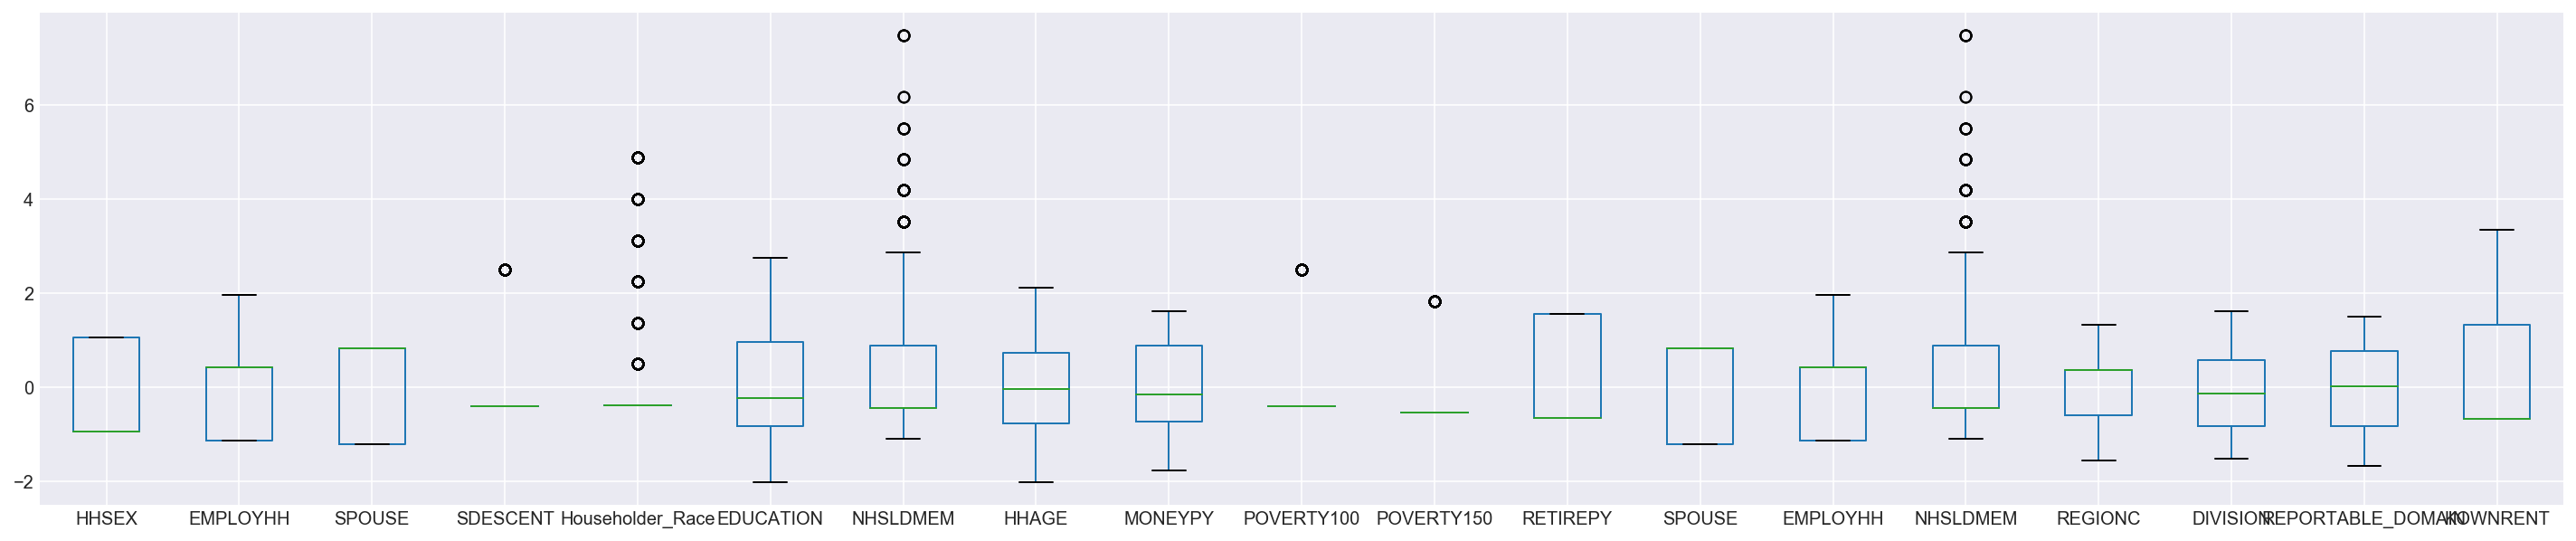

In [210]:
control_stand.plot(kind='box',figsize=(25,5))

Control for gender, race, education, income, household size, ownership status, and region. The variables associated those 

    GENDER: 
        - 'HHSEX'- Sex of householder	

    RACE:
        -'SDESCENT' - Householder is Hispanic or Latino
        -'Householder_Race'- Householder's Race

    EDUCATION:
        -'EDUCATION' - Highest education completed by householder

    INCOME:
        -'MONEYPY'- 2009 gross household income
        -'POVERTY100' - Household income at or below 100% of poverty line
        -'POVERTY150' - Household income at or below 150% of poverty line
        -'RETIREPY' - Household members received retirement income in 2009
        -'EMPLOYHH'- Employment status of householder


    HOUSEHOLD SIZE:
        -'SPOUSE'- Householder lives with spouse or partner
        -'NHSLDMEM' - Number of household members

    REGION:
        -'REGIONC'- Census Region 
        -'DIVISION' - Census Division
        -'REPORTABLE_DOMAIN' - Reportable states and groups of state

    WEIGHTS:
        -NWEIGHT - Final sample weight

    OWNERSHIP STATUS:
        -KOWNRENT - Housing unit is owned, rented, or occupied without payment of rent

In [26]:
RECS[['TOTCSQFT', 'ZTOTSQFT']].apply(pd.Series.value_counts).sample(5)


TOTCSQFT  ZTOTSQFT
1435  1.0      NaN      
1386  3.0      NaN      
2021  1.0      NaN      
516   2.0      NaN      
1233  2.0      NaN

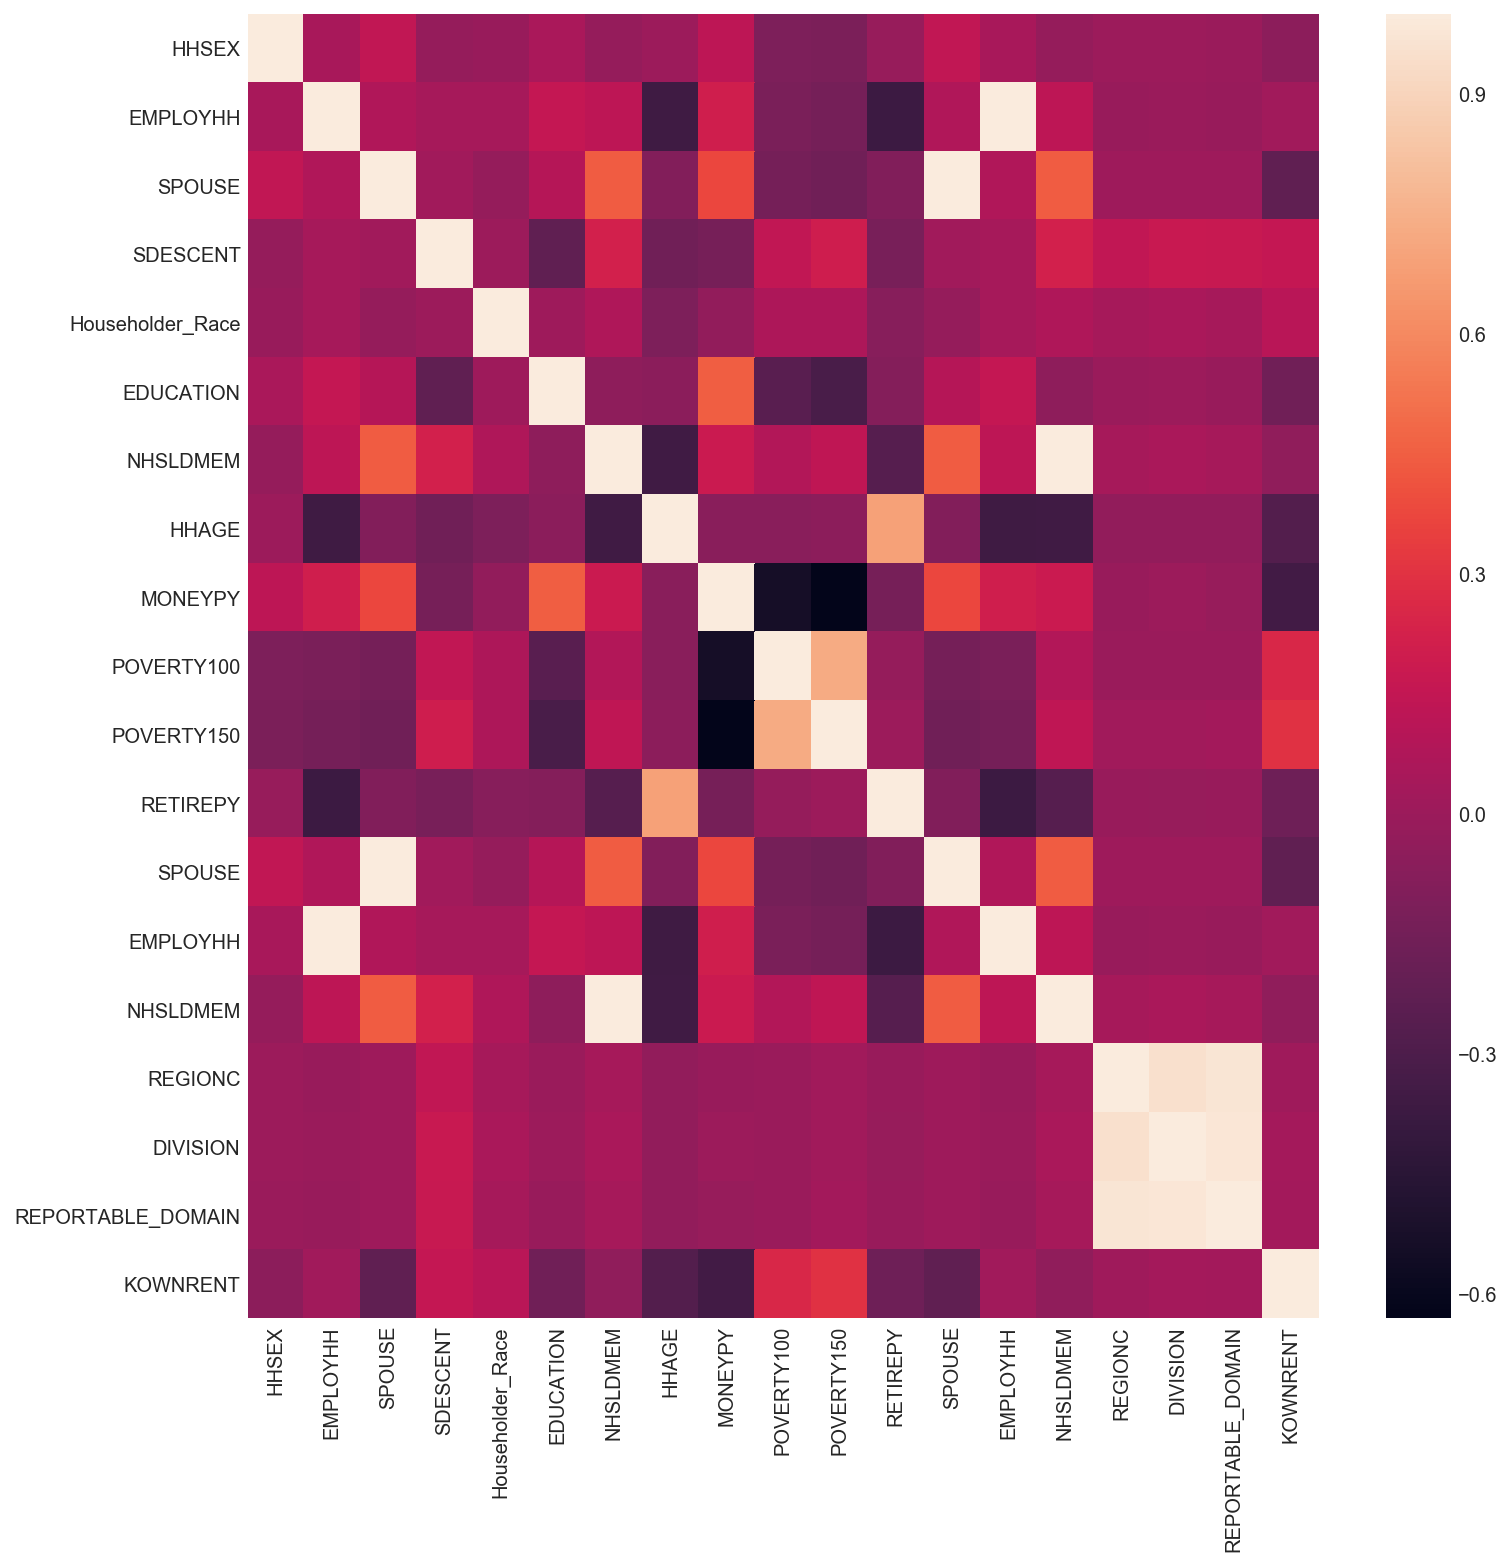

In [346]:
import matplotlib.pyplot as plt
# Let's look for some correlations in the control infromation. (There really aren't any.)

size = (12, 12)
fig, ax = plt.subplots(figsize=size)
sns.heatmap(ax=ax, data=control_stand.corr())

In [28]:
'''   Find the number of respondents by race
1\n2\n3\n4\n5\n6\n7
      White Alone\nBlack or African/American Alone\nAmerican Indian or Alaska Native Alone\nAsian Alone\
      nNative Hawaiian or Other Pacific Islander Alone\nSome Other Race Alone\n2 or More Races Selected
'''

race = RECS[['HHSEX','Householder_Race']].groupby(['Householder_Race']).sum().reset_index().sort_values(['HHSEX'],\
                                ascending=False)
race

Householder_Race  HHSEX
0  1                 14175
1  2                 2108 
3  4                 710  
5  6                 307  
6  7                 241  
2  3                 164  
4  5                 60

[Text(0,0,u'White'),
 Text(0,0,u'Black or African/American'),
 Text(0,0,u'Asian'),
 Text(0,0,u'Some Other Race'),
 Text(0,0,u'2 or More Races'),
 Text(0,0,u'American Indian or Alaska Native'),
 Text(0,0,u'Native Hawaiian or Other Pacific Islander')]

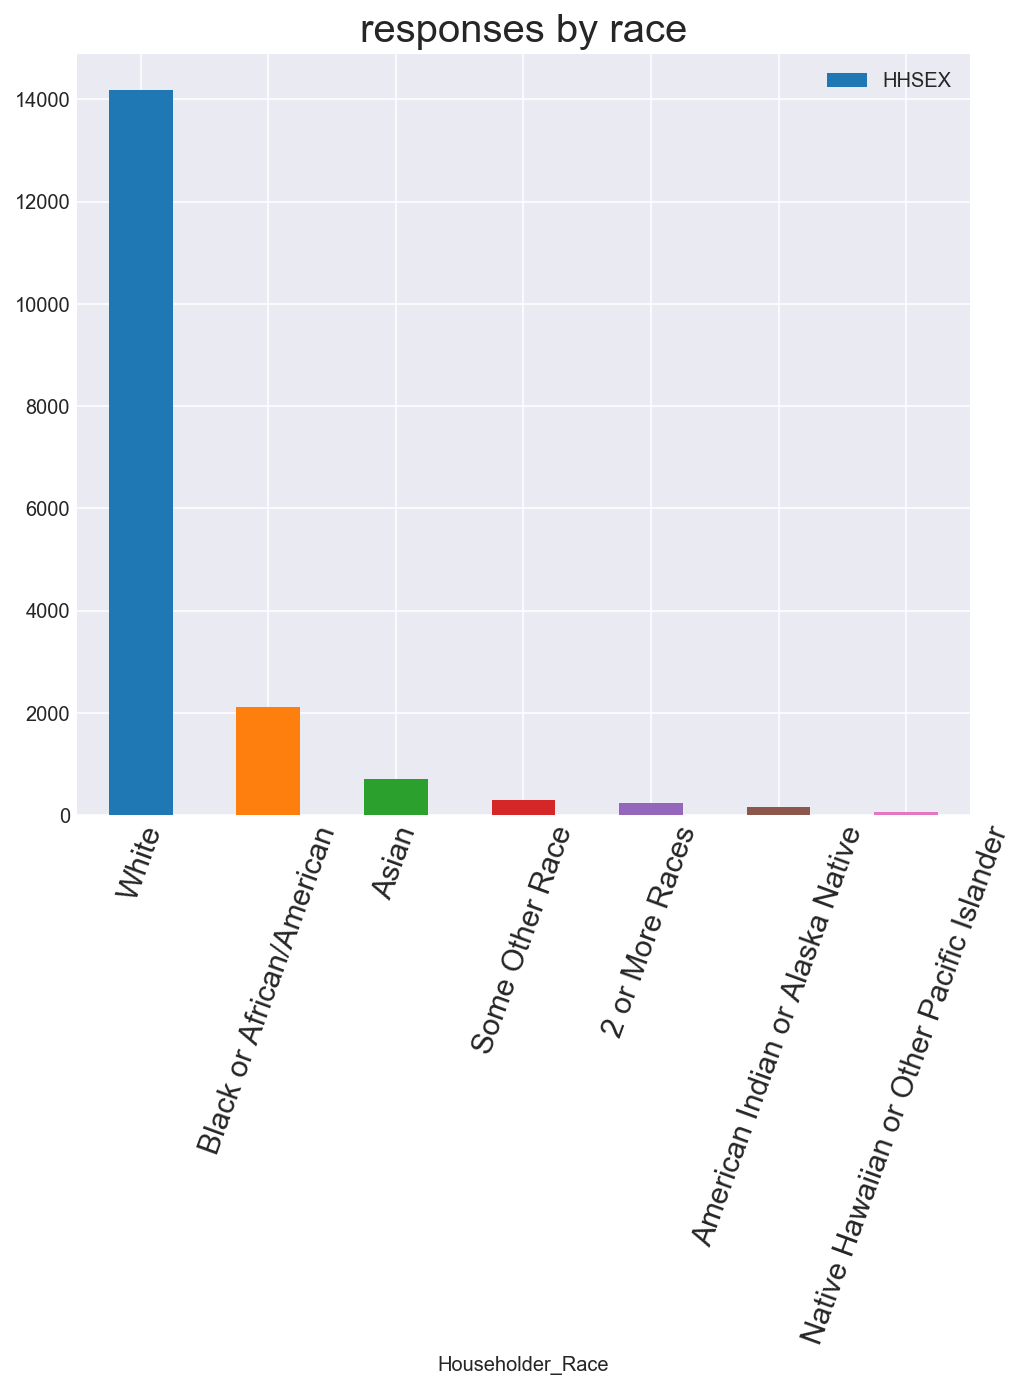

In [139]:
#plot the number of respondents by race
fig, ax = plt.subplots(figsize=(8,7))
race.plot(kind='bar', x='Householder_Race', y='HHSEX', ax=ax)
ax.set_title('responses by race', fontsize=20)
x_labels = ['White', 'Black or African/American', 'Asian', 'Some Other Race','2 or More Races',
          'American Indian or Alaska Native','Native Hawaiian or Other Pacific Islander']
ax.set_xticklabels(x_labels, rotation=70,fontsize=15)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

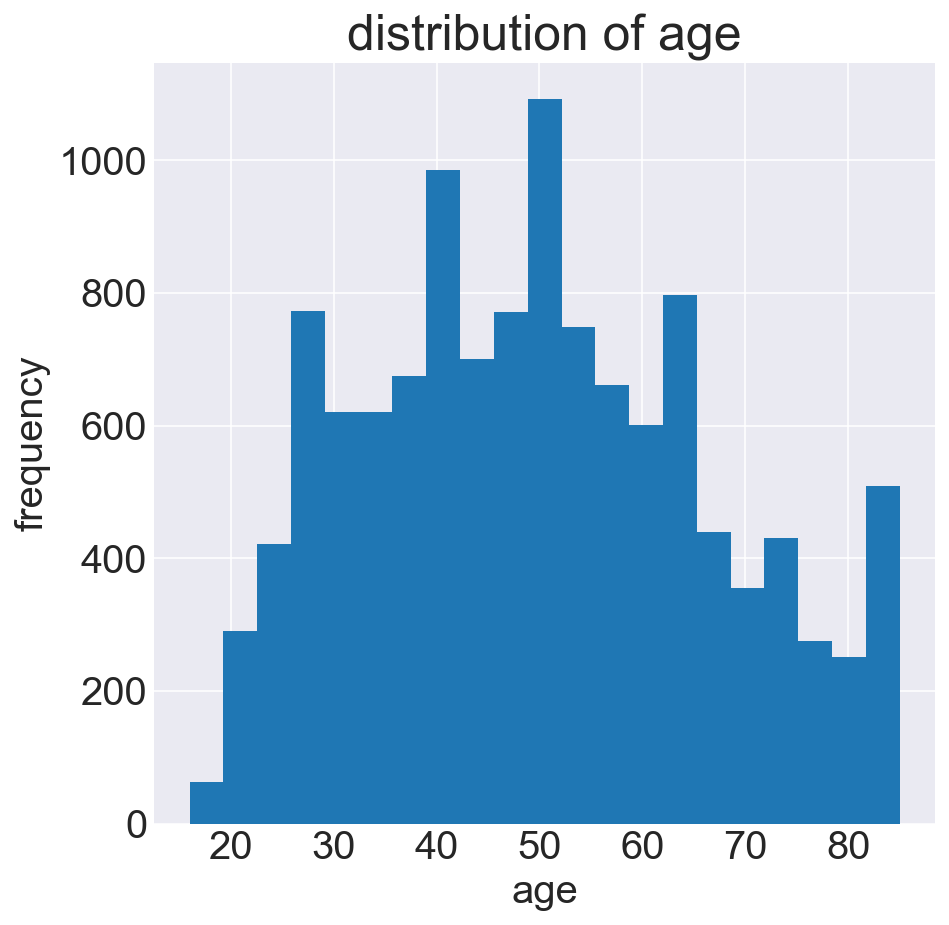

In [547]:
#look at distribution of age of respondents

fig, ax = plt.subplots(figsize=(7,7))

RECS['HHAGE'].plot(kind='hist', bins=21, ax=ax)
ax.set_title('distribution of age', fontsize=25)
ax.set_xlabel('age', fontsize=20)
ax.set_ylabel('frequency', fontsize=20)
ax.yaxis.label.set_size(20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)


      HHAGE    MONEYPY
0  (10, 20]  7.909722 
1  (20, 30]  11.428138
2  (30, 40]  13.867580
3  (40, 50]  14.664549
4  (50, 60]  14.304998
5  (60, 70]  12.686005
6  (70, 80]  10.238821
7  (80, 90]  9.147260 


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

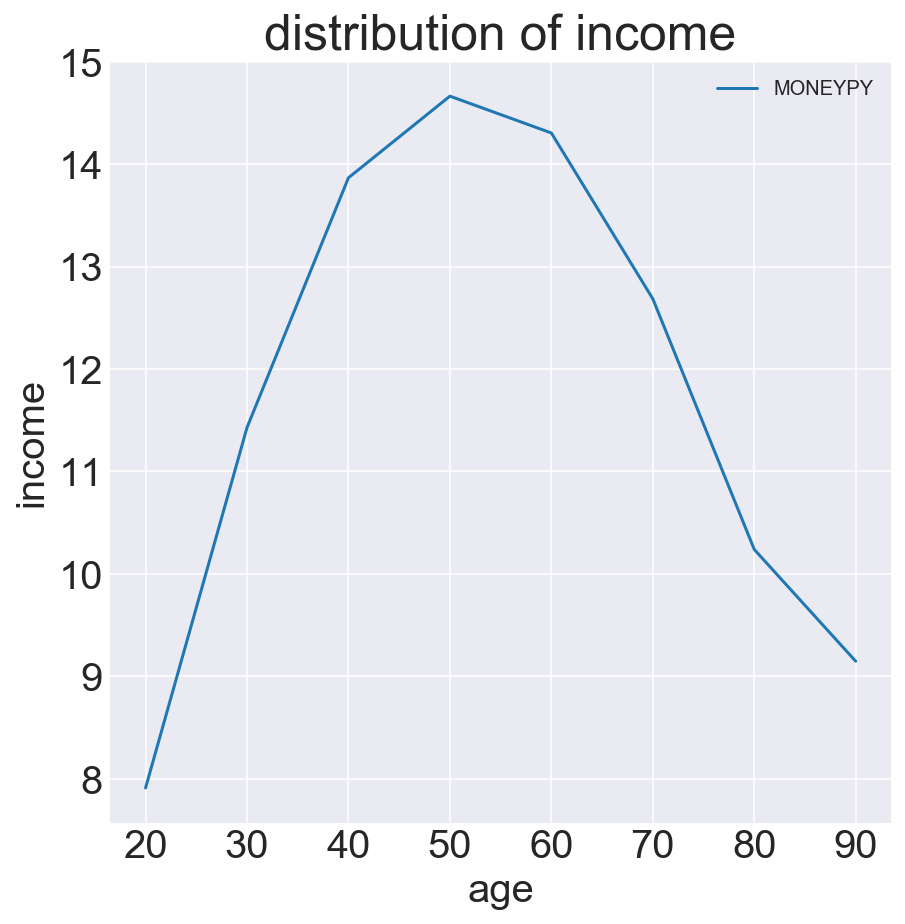

In [537]:
# Look at the distribution of income over age brackets
income = RECS[['MONEYPY']].groupby(pd.cut(RECS['HHAGE'], np.arange(10,90+10,10))).mean().reset_index()\

print income


fig, ax = plt.subplots(figsize=(7,7))

income.plot(kind='line', ax=ax)
ax.set_title('distribution of income', fontsize=25)
ax.set_xlabel('age', fontsize=20)
ax.set_ylabel('income', fontsize=20)
x_labels= ('10','20','30','40','50','60','70','80','90')
ax.set_xticklabels(x_labels,fontsize=20)
ax.yaxis.label.set_size(20)
plt.setp(ax.get_yticklabels(), fontsize=20)


In [309]:
print "POVERTY100: ", RECS['POVERTY100'].value_counts()
print "POVERTY150: ", RECS['POVERTY150'].value_counts()
print "RETIREPY: ", RECS['RETIREPY'].value_counts()

# INCOME:
#     -'MONEYPY'- 2009 gross household income
#     -'POVERTY100' - Household income at or below 100% of poverty line
#     -'POVERTY150' - Household income at or below 150% of poverty line
#     -'RETIREPY' - Household members received retirement income in 2009
#     -'EMPLOYHH'- Employment status of householder

POVERTY100:  0    10408
1    1675 
Name: POVERTY100, dtype: int64
POVERTY150:  0    9290
1    2793
Name: POVERTY150, dtype: int64
RETIREPY:  0    8516
1    3567
Name: RETIREPY, dtype: int64


[Text(0,0,u'10'),
 Text(0,0,u''),
 Text(0,0,u''),
 Text(0,0,u'20'),
 Text(0,0,u''),
 Text(0,0,u''),
 Text(0,0,u'30'),
 Text(0,0,u''),
 Text(0,0,u''),
 Text(0,0,u'40'),
 Text(0,0,u''),
 Text(0,0,u''),
 Text(0,0,u'50'),
 Text(0,0,u''),
 Text(0,0,u''),
 Text(0,0,u'60'),
 Text(0,0,u''),
 Text(0,0,u''),
 Text(0,0,u'70'),
 Text(0,0,u''),
 Text(0,0,u''),
 Text(0,0,u'80'),
 Text(0,0,u''),
 Text(0,0,u'')]

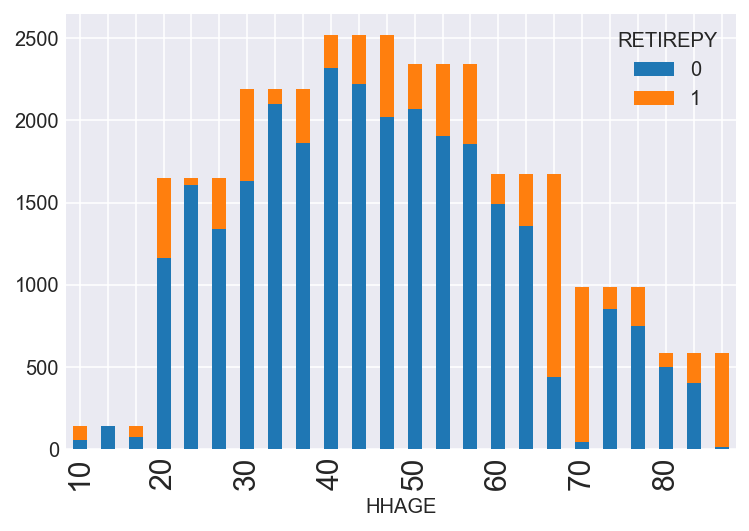

In [339]:
#help - update bar colors for each different groupby in plot
fig, ax=plt.subplots()
POVERTY150 = RECS.groupby(['POVERTY150', pd.cut(RECS['HHAGE'], np.arange(10,90+10,10))])\
       .size().unstack(0)

POVERTY100 = RECS.groupby(['POVERTY100', pd.cut(RECS['HHAGE'], np.arange(10,90+10,10))])\
       .size().unstack(0)
RETIREPY = RECS.groupby(['RETIREPY', pd.cut(RECS['HHAGE'], np.arange(10,90+10,10))])\
       .size().unstack(0)

pd.concat([POVERTY150, POVERTY100, RETIREPY]).sort_index().plot(kind='bar', stacked=True, ax=ax)
x_labels= ('10','','','20','','','30','','','40','','','50','','','60','','','70','','','80','','','90')
ax.set_xticklabels(x_labels,fontsize=15)



2    3193
3    2701
5    2428
4    1193
1    1033
6    957 
7    221 
0    200 
8    157 
Name: EDUCATION, dtype: int64


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

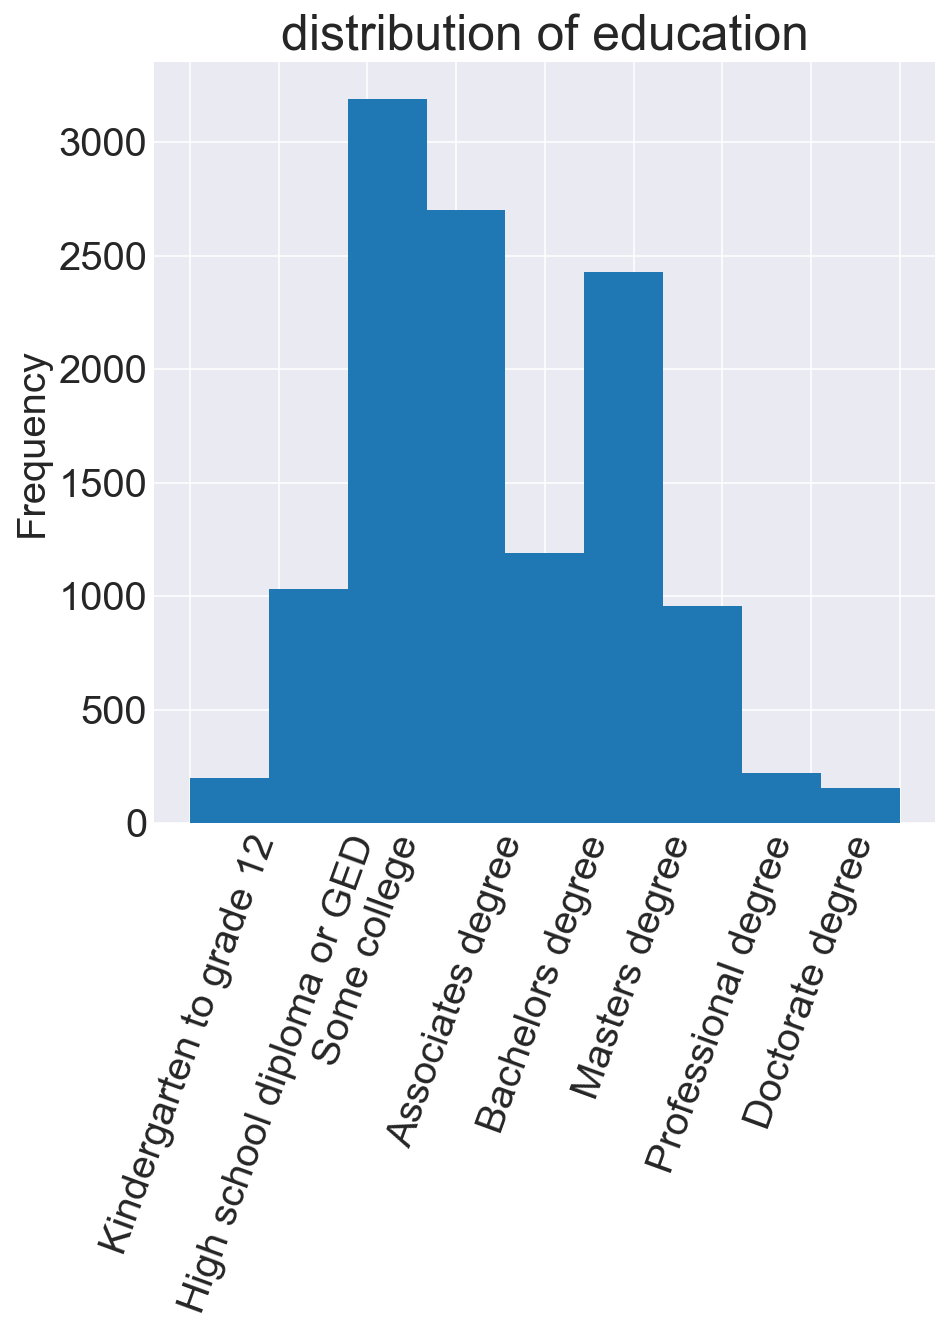

In [536]:
'''
0\n1\n2\n3\n4\n5\n6\n7\n8
No schooling completed\nKindergarten to grade 12\nHigh school diploma or GED\nSome college, 
no degree\nAssociate's degree\nBachelor's degree\nMaster's degree\nProfessional degree\nDoctorate degree

'''
print RECS['EDUCATION'].value_counts()

fig, ax = plt.subplots(figsize=(7,7))

RECS['EDUCATION'].plot(kind='hist',bins=9, ax=ax)
ax.set_title('distribution of education', fontsize=25)
x_labels = ['No schooling completed', 'Kindergarten to grade 12', 'High school diploma or GED', 'Some college',\
'Associates degree', 'Bachelors degree','Masters degree', 'Professional degree', 'Doctorate degree']
ax.set_xticklabels(x_labels, rotation=70,fontsize=20)
ax.yaxis.label.set_size(20)
plt.setp(ax.get_yticklabels(), fontsize=20)


KOWNRENT     1     2   3
HHAGE                   
(10, 20]  30    112   2 
(20, 30]  572   1048  29
(30, 40]  1321  843   26
(40, 50]  1798  699   22
(50, 60]  1819  494   28
(60, 70]  1354  306   12
(70, 80]  801   173   10
(80, 90]  445   126   13


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

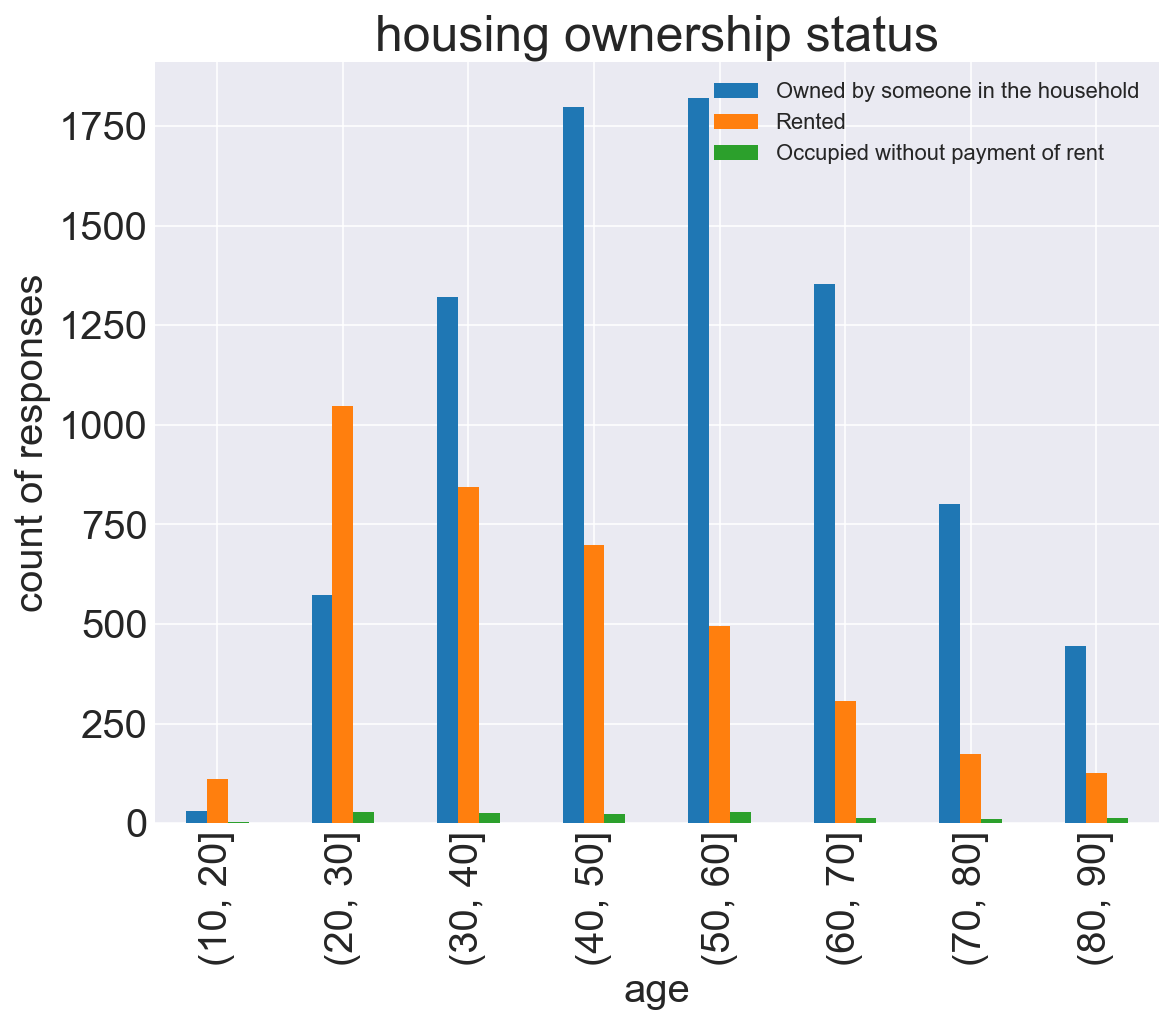

In [546]:
# look at ownership status of respondents bracketed by age range

ownership =RECS.groupby([pd.cut(RECS['HHAGE'], np.arange(10,90+10,10)),'KOWNRENT']).size().unstack(fill_value=0)
print ownership

fig, ax = plt.subplots(figsize=(9,7))
ownership.plot(kind='bar', ax=ax)
ax.set_title('housing ownership status', fontsize=25)
ax.set_xlabel('age', fontsize=20)
ax.set_ylabel('count of responses', fontsize=20)
ax.legend(('Owned by someone in the household', 'Rented', 'Occupied without payment of rent'), fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)

## Electricty data

In [48]:
'''
'KWHSPH', 'Electricity usage for space heating, in kilowatt-hours, 2009'],
'KWHCOL','Electricity usage for air-conditioning, central and window/wall (room), in kilowatt-hours, 2009'],
'KWHWTH','Electricity usage for water heating, in kilowatt-hours, 2009'],
'KWHRFG','Electricity usage for refrigerators, in kilowatt-hours, 2009'],
'KWHOTH','Electricity usage for other purposes (all end-uses except SPH, COL, WTH, and RFG), in kilowatt-hours, 2009'],
'BTUELSPH','Electricity usage for space heating, in thousand BTU, 2009'],
'BTUELCOL','Electricity usage for air-conditioning, central and window/wall (room), in thousand BTU, 2009'],
'BTUELWTH','Electricity usage for water heating, in thousand BTU, 2009'],
'BTUELRFG','Electricity usage for refrigerators, in thousand BTU, 2009'],
'BTUELOTH','Electricity usage for other purposes (all end-uses except SPH, COL, WTH, and RFG), in thousand BTU, 2009']]
'''

electricity = RECS[['KWHSPH','KWHCOL','KWHWTH','KWHRFG', 'KWHOTH','BTUELSPH','BTUELCOL',
                   'BTUELWTH',
                   'BTUELRFG',
                   'BTUELOTH']]


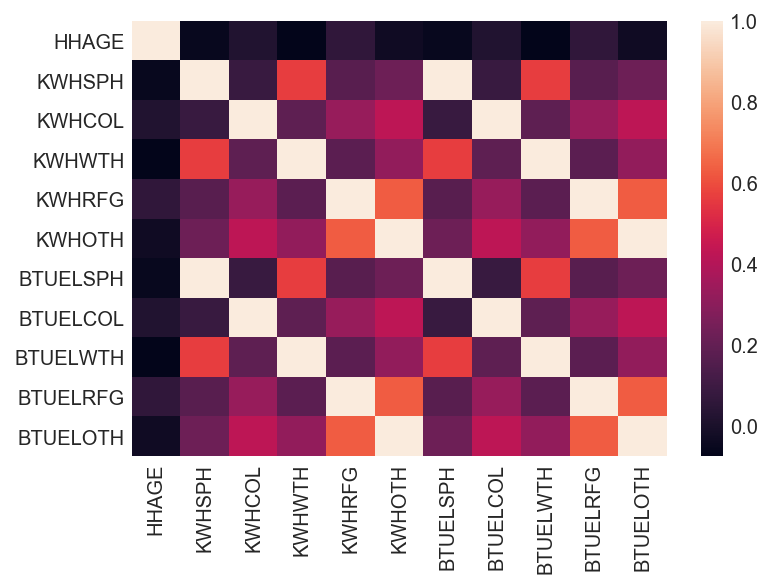

In [49]:
# look at correlations between age and electricity features
sns.heatmap(RECS[['HHAGE','KWHSPH','KWHCOL','KWHWTH','KWHRFG', 'KWHOTH','BTUELSPH','BTUELCOL',
                   'BTUELWTH',
                   'BTUELRFG',
                   'BTUELOTH']].corr())

In [50]:
electricity = pd.DataFrame(electricity)
electricity.head()

KWHSPH    KWHCOL    KWHWTH    KWHRFG    KWHOTH   BTUELSPH   BTUELCOL  \
0  3186.707  3068.795  2968.450  1515.504  7726.545  10873.045  10470.729   
1  0.000     181.998   0.000     1310.220  3655.782  0.000      620.979     
2  0.000     184.459   0.000     915.664   1117.878  0.000      629.389     
3  0.000     1063.022  1887.531  1670.534  5393.913  0.000      3627.013    
4  0.000     0.000     0.000     346.468   2522.532  0.000      0.000       

    BTUELWTH  BTUELRFG   BTUELOTH  
0  10128.354  5170.899  26362.973  
1  0.000      4470.477  12473.544  
2  0.000      3124.320  3814.291   
3  6440.221   5699.833  18403.933  
4  0.000      1182.144  8606.856

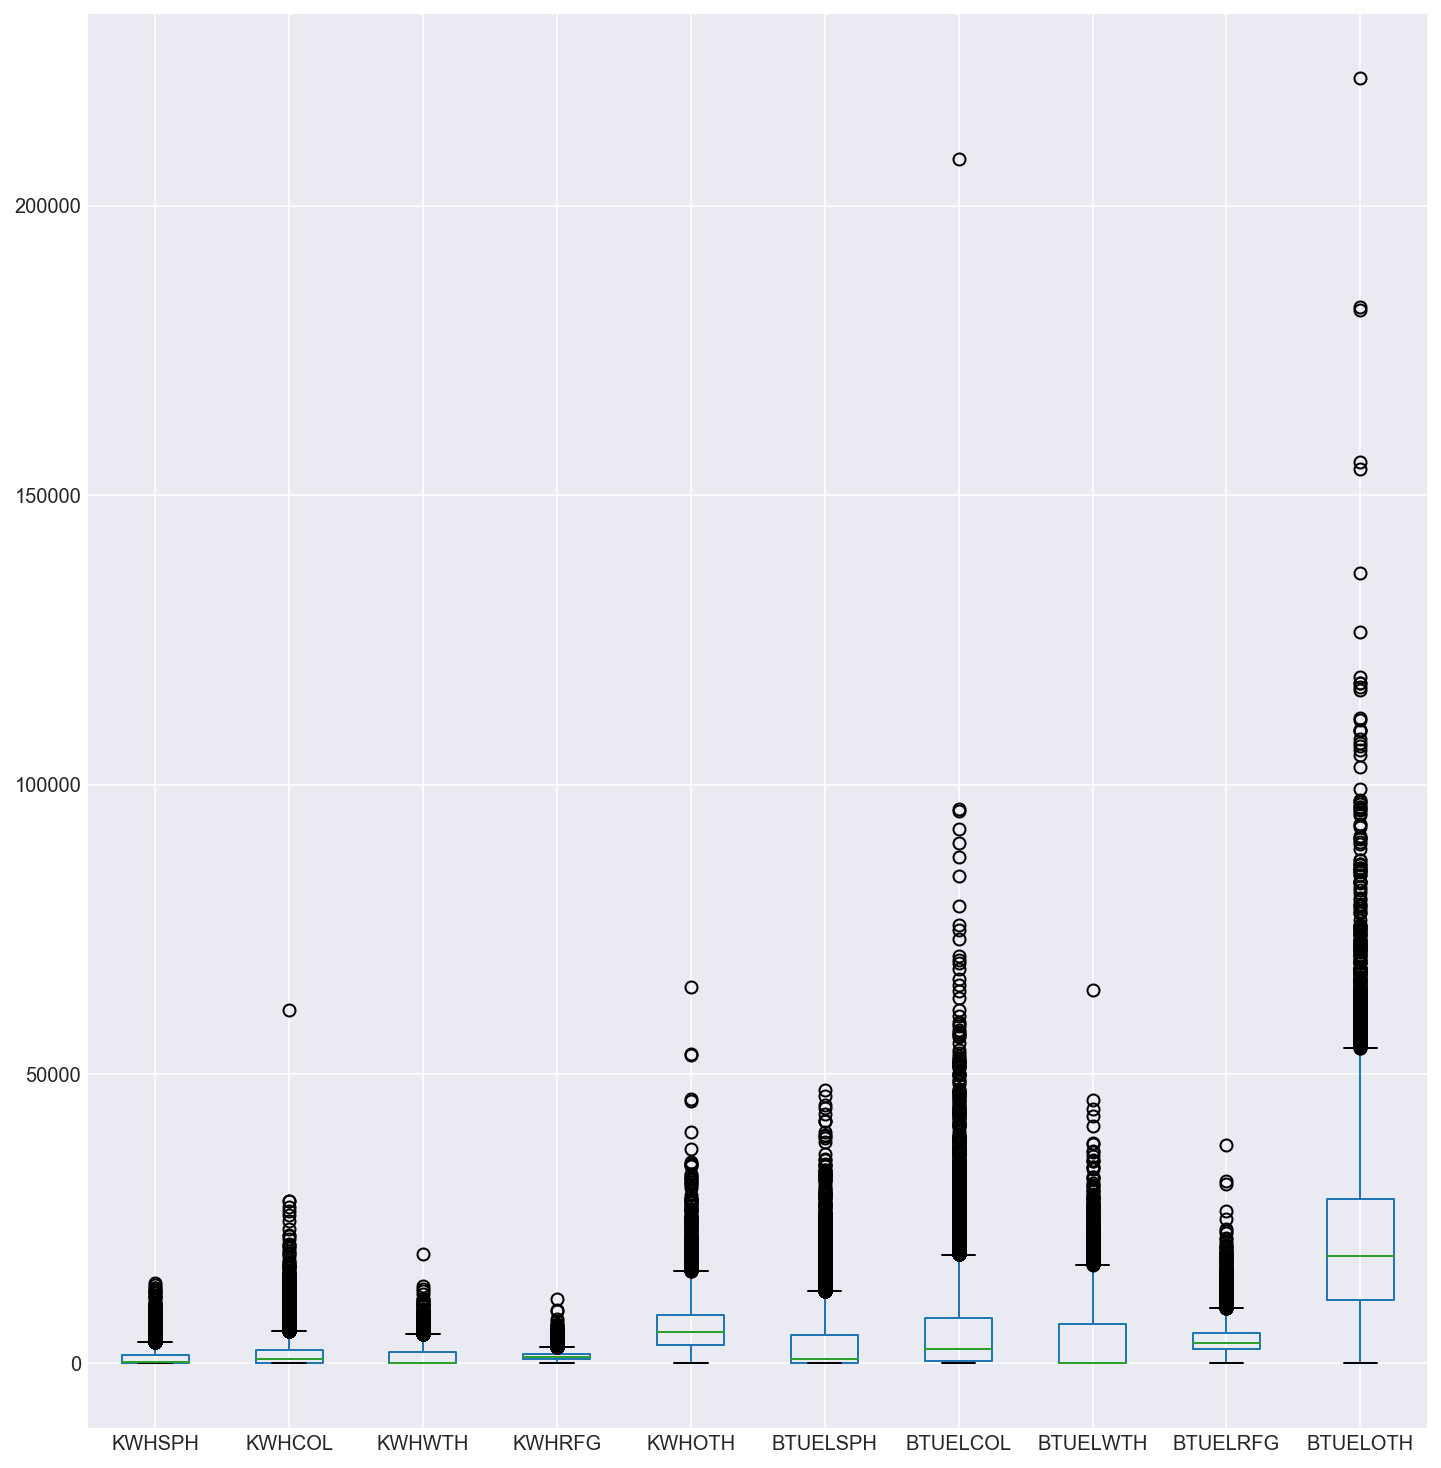

In [51]:
electricity.plot(kind='box', figsize =(12,13))

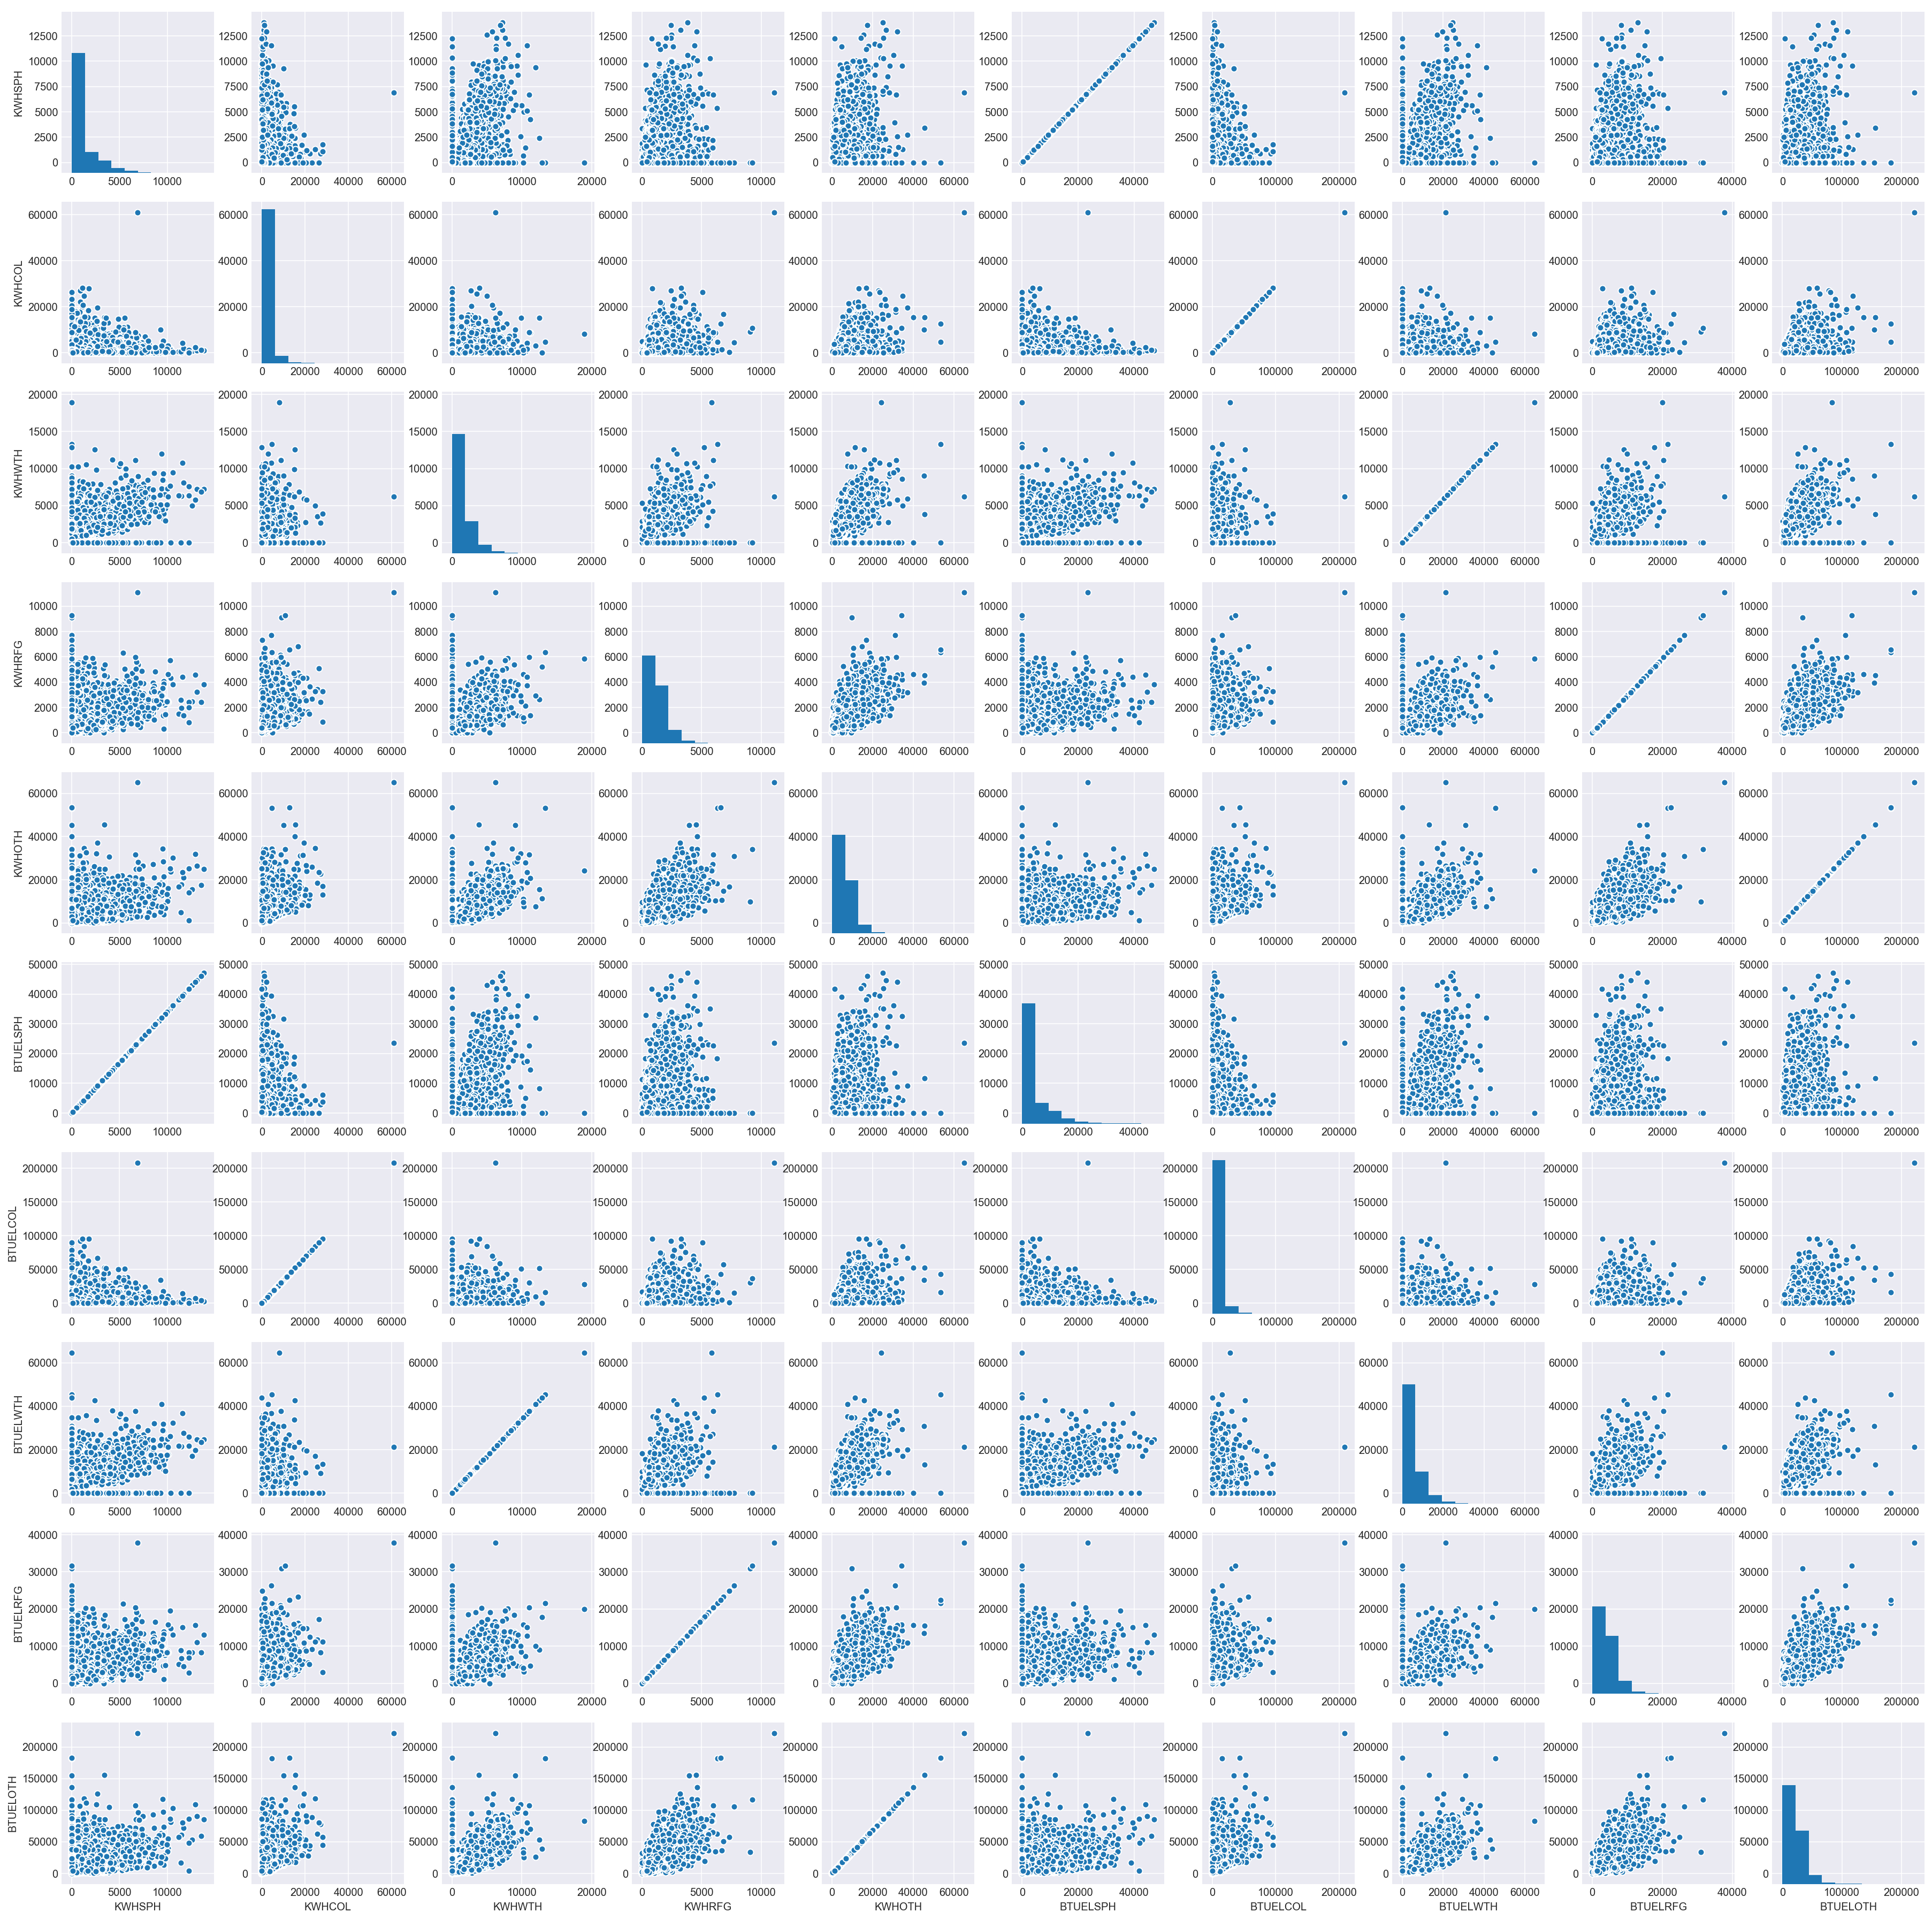

In [52]:
sns.pairplot(electricity)

## Space heating data

In [ ]:
'''
Main space heating
    ['EQUIPM', 'Type of main space heating equpiment used'],
       ['MAINTHT',
        'Routine service or maintenance performed on main space heating equipment'],
       ['EQUIPAGE', 'Age of main space heating equipment'],
       ['HELPHT',
        'Assistance for replacing or maintaining main space heating equipment'],
       ['HELPHTY', 'Year of assistance for main space heating equipment'],
       ['EQMAMT',
        'Portion of space heating provided by main space heating equipment (for homes with 
        main and secondary heating only)']
'''


In [53]:
main_space_heat = RECS[['EQUIPM','MAINTHT','EQUIPAGE','HELPHT','HELPHTY','EQMAMT']]

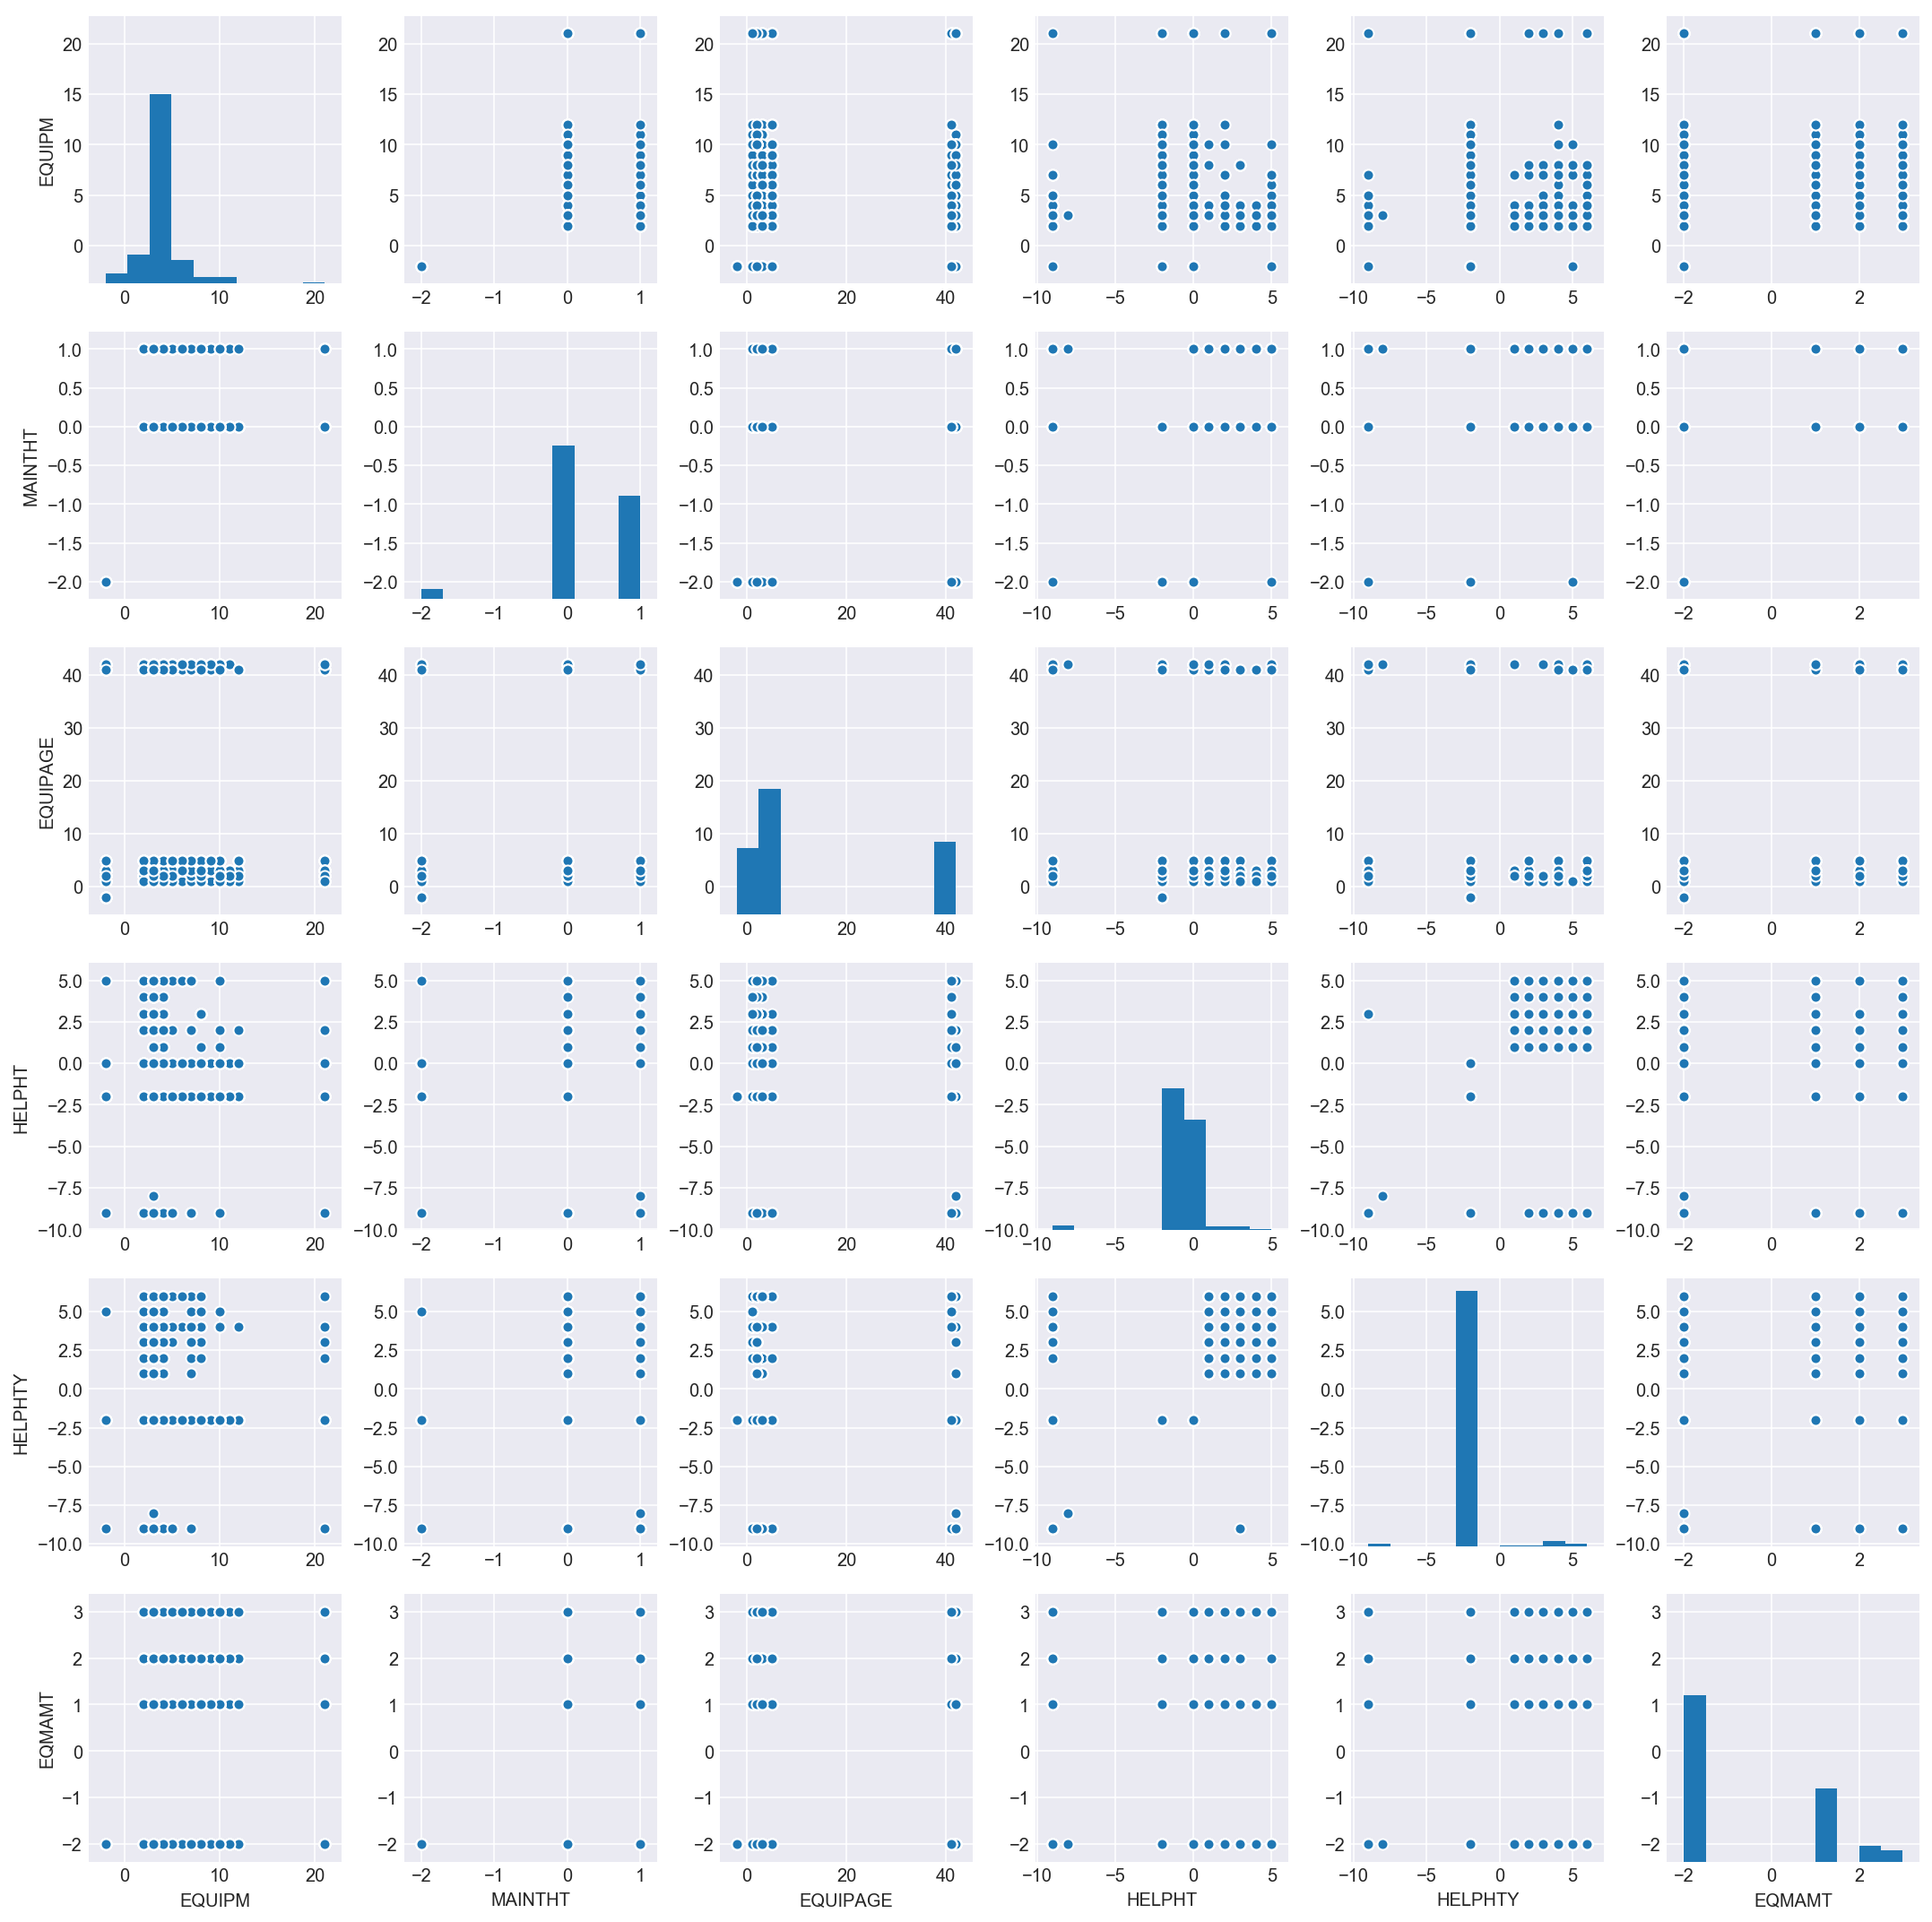

In [54]:
sns.pairplot(main_space_heat)

# engineer features

In [55]:
'''
Drop unwanted columns. Any column heading beginning with the letter 'Z' denotes an imputation flag. The actual 
imputation is recorded in a separate column, therefore remove all the imputation flag columns. 
''' 
unwanted = RECS.columns[RECS.columns.str.startswith('Z')]


In [56]:
RECS2 =RECS.drop(unwanted, axis=1, errors='ignore')

In [57]:
print RECS2.shape
RECS2.head()

(12083, 572)


DOEID  REGIONC  DIVISION  REPORTABLE_DOMAIN  TYPEHUQ       NWEIGHT  HDD65  \
0  1      2        4         12                 2        2471.679705   4742    
1  2      4        10        26                 2        8599.172010   2662    
2  3      1        1         1                  5        8969.915921   6233    
3  4      2        3         7                  2        18003.639600  6034    
4  5      1        1         1                  3        5999.605242   5388    

   CDD65  HDD30YR  CDD30YR    ...     SCALEEL  KAVALNG PERIODNG SCALENG  \
0  1080   4953     1271       ...     0       -2       -2       -2        
1  199    2688     143        ...     0        1        1        0        
2  505    5741     829        ...     0        3        5        3        
3  672    5781     868        ...     3        3        5        3        
4  702    5313     797        ...     0        1        1        0        

   PERIODLP  SCALELP  PERIODFO  SCALEFO  PERIODKR  SCALEKER  
0 -2        -2       -2        -2       -2        -2         
1 -2        -2       -2        -2       -2        -2         
2 -2        -2       -2        -2       -2        -2         
3 -2        -2       -2        -2       -2        -2         
4 -2        -2       -2        -2       -2        -2         

[5 rows x 572 columns]

In [58]:
'''
In the RECS microdata document, we learn that a common code for “not-applicable” responses is (-2). Look at the amount 
of (-2.0) accross columns. Example of one column below.
'''
RECS2['NKRGALNC'].value_counts()[-2]

11986

In [59]:
# Count the number of (-2.0) entries accross all columns 
((RECS2 ==-2).sum()/len(RECS2)).sample(4)

AUTOCOOLNITE    0.697095
PERIODNG        0.379790
TVAUDIOSYS3     0.542580
DOLLPWTH        0.000000
dtype: float64

In [60]:
# Extract the columns that have larger than 90% of responses as "not applicable" or (-2.0)
# Examine the size and columns names
high_na = (RECS2 ==-2).sum()/len(RECS2)>.9

print (high_na[high_na]==True).shape
print_full (high_na[high_na]==True)

(96,)
CONDCOOP         True
CONVERSION       True
ORIG1FAM         True
LOOKLIKE         True
TYPEHUQ4         True
PCTBSTHT         True
BASECL2          True
PCTBSTCL         True
FINATTRMS        True
ATTCHT2          True
PCTATTHT         True
ATTCCL2          True
PCTATTCL         True
STGRILA          True
HELPFRIY         True
TYPERFR3         True
SIZRFRI3         True
REFRIGT3         True
MONRFRI3         True
AGERFRI3         True
ESFRIG3          True
REPLCFRZ         True
HELPFRZ          True
HELPFRZY         True
UPRTFRZR2        True
SIZFREEZ2        True
FREEZER2         True
AGEFRZR2         True
HELPDWY          True
HELPCWY          True
TVONWDWATCH3     True
TVONWEWATCH3     True
MONITOR3         True
PCSLEEP3         True
DNTHEAT          True
EQUIPNOHEAT      True
FUELNOHEAT       True
HELPHTY          True
FURNFUEL         True
RADFUEL          True
PIPEFUEL         True
RMHTFUEL         True
HSFUEL           True
NGFPFLUE         True
USENGFP          True
RNGF

In [61]:
# drop the column names found in high_na from RECS2
RECS_sub = RECS2.drop((high_na[high_na]==True).index, axis=1)

In [62]:
print RECS_sub.shape
RECS_sub

(12083, 476)


DOEID  REGIONC  DIVISION  REPORTABLE_DOMAIN  TYPEHUQ       NWEIGHT  \
0      1      2        4         12                 2        2471.679705    
1      2      4        10        26                 2        8599.172010    
2      3      1        1         1                  5        8969.915921    
3      4      2        3         7                  2        18003.639600   
4      5      1        1         1                  3        5999.605242    
5      6      2        4         10                 2        4232.486778    
6      7      1        2         3                  2        7862.341967    
7      8      3        5         17                 2        6297.038285    
8      9      1        2         5                  3        12156.721510   
9      10     2        4         12                 2        3242.224473    
10     11     4        10        26                 4        8812.434127    
11     12     1        2         4                  2        15489.574010   
12     13     4        10        27                 2        7951.519208    
13     14     3        5         15                 5        7118.116340    
14     15     4        8         23                 5        14249.903790   
15     16     3        5         14                 2        37518.828060   
16     17     3        5         16                 2        15622.341370   
17     18     1        2         3                  4        7553.728084    
18     19     4        8         22                 1        5115.108852    
19     20     2        4         10                 2        4132.534817    
20     21     4        10        26                 2        7169.306781    
21     22     2        3         7                  2        17230.621450   
22     23     1        2         3                  2        10487.257260   
23     24     3        5         17                 2        7495.459040    
24     25     2        3         9                  2        1137.558659    
25     26     1        1         2                  4        4812.840098    
26     27     2        3         9                  5        8884.939148    
27     28     4        10        26                 2        8324.527796    
28     29     3        5         17                 1        11829.917770   
29     30     3        7         21                 2        8101.628218    
...    ..    ..       ..         ..                ..                ...    
12053  12054  3        5         13                 5        10279.744360   
12054  12055  3        5         13                 2        10215.139100   
12055  12056  3        7         21                 2        9275.971373    
12056  12057  2        3         8                  2        15585.447930   
12057  12058  3        5         15                 5        6590.834042    
12058  12059  4        10        26                 2        8599.173595    
12059  12060  2        3         6                  2        16137.478610   
12060  12061  2        3         8                  2        14591.865190   
12061  12062  1        2         3                  2        8159.841658    
12062  12063  4        10        26                 2        7169.307551    
12063  12064  2        4         10                 2        10379.469540   
12064  12065  4        8         23                 2        39427.929430   
12065  12066  2        4         10                 2        4697.213286    
12066  12067  4        10        26                 5        8500.603087    
12067  12068  1        1         1                  5        8980.269975    
12068  12069  1        2         3                  5        7598.354373    
12069  12070  1        1         1                  2        7854.159943    
12070  12071  4        10        26                 3        5744.189259    
12071  12072  3        6         18                 2        10560.968910   
12072  12073  4        10        26                 2        6767.419232    
120

In [63]:
print_full (RECS_sub.columns.values)

['DOEID' 'REGIONC' 'DIVISION' 'REPORTABLE_DOMAIN' 'TYPEHUQ' 'NWEIGHT'
 'HDD65' 'CDD65' 'HDD30YR' 'CDD30YR' 'Climate_Region_Pub' 'AIA_Zone'
 'METROMICRO' 'UR' 'KOWNRENT' 'YEARMADE' 'YEARMADERANGE' 'OCCUPYYRANGE'
 'NUMFLRS' 'NUMAPTS' 'WALLTYPE' 'ROOFTYPE' 'STUDIO' 'NAPTFLRS' 'STORIES'
 'BEDROOMS' 'NCOMBATH' 'NHAFBATH' 'OTHROOMS' 'TOTROOMS' 'CELLAR' 'CRAWL'
 'CONCRETE' 'BASEFIN' 'FINBASERMS' 'BASEHEAT' 'BASEHT2' 'BASECOOL'
 'BASEUSE' 'ATTIC' 'ATTICFIN' 'ATTCHEAT' 'ATTCCOOL' 'ATTICUSE' 'PRKGPLC1'
 'SIZEOFGARAGE' 'GARGLOC' 'GARGHEAT' 'GARGCOOL' 'PRKGPLC2' 'SIZEOFDETACH'
 'OUTLET' 'STOVEN' 'STOVENFUEL' 'STOVE' 'STOVEFUEL' 'OVEN' 'OVENFUEL'
 'OVENUSE' 'OVENCLN' 'TYPECLN' 'MICRO' 'AMTMICRO' 'DEFROST' 'OUTGRILL'
 'OUTGRILLFUEL' 'TOPGRILL' 'TOASTER' 'NUMMEAL' 'FUELFOOD' 'COFFEE'
 'NUMFRIG' 'TYPERFR1' 'SIZRFRI1' 'REFRIGT1' 'ICE' 'AGERFRI1' 'ESFRIG'
 'REPLCFRI' 'HELPFRI' 'TYPERFR2' 'SIZRFRI2' 'REFRIGT2' 'MONRFRI2'
 'AGERFRI2' 'ESFRIG2' 'SEPFREEZ' 'NUMFREEZ' 'UPRTFRZR' 'SIZFREEZ' 'FREEZER'
 'AGEFRZ

In [64]:
# dummy urban to 0 and rural to 1
RECS_sub['URBAN'] = pd.get_dummies(RECS_sub['UR']).iloc[:,:1]
RECS_sub['RURAL'] = RECS_sub['URBAN']

In [65]:
RECS_sub.drop('URBAN', axis=1, inplace=True, errors='ignore')

In [66]:
# 0 is urban and 1 is rural
RECS_sub['RURAL'].value_counts()

0    9656
1    2427
Name: RURAL, dtype: int64

In [67]:
RECS_sub['METROMICRO'].value_counts()


METRO    10302
MICRO    1109 
NONE     672  
Name: METROMICRO, dtype: int64

In [68]:
# dummy RECS_sub['METROMICRO'], but just keep it around for now since we're not going to model with it.

metromicro= pd.get_dummies(RECS_sub['METROMICRO']).iloc[:,:2]
print metromicro.shape
metromicro.head()


(12083, 2)


METRO  MICRO
0  1      0    
1  1      0    
2  1      0    
3  1      0    
4  1      0

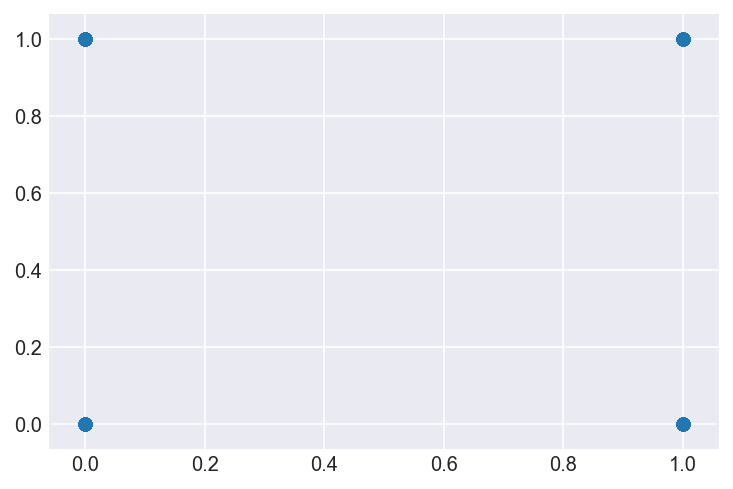

In [69]:
# look at the two object features we dummied. (This plot doesn't really tell me anything)
plt.scatter(x=RECS_sub["RURAL"], y=metromicro["MICRO"]) 

### Create models using all X variables as default that includes everything
- includes all types of energy use, behavior, ownernership, and all demographic information besides age

In [70]:
# pre-process and performance imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,\
roc_auc_score, roc_curve
from sklearn.decomposition import PCA


In [71]:
# Modeling imports 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

In [72]:
# drop METROMICRO from data set since it's still an object at this point
full_model = RECS_sub.drop(['METROMICRO','UR'], axis=1)

In [73]:
# try to use everything in this first model. Set up X
X = full_model.drop('HHAGE', axis=1)

In [75]:
# set up target variable as respondents whose age is between 20 and 40 (inclusive.)

y = pd.Series(np.where(np.logical_and(RECS['HHAGE']>=20, RECS['HHAGE']<=40),1,0))
print "number of early adulthood respondents:", y.sum(), 'length of dataframe: ', len(y)

 number of early adulthood respondents: 3920 length of dataframe:  12083


In [76]:
# standardize features

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [78]:
# hold out 20% to test
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.20, random_state=42)

In [79]:
# get baseline model. Our model will have to perform better than 67.56% 
max(np.mean(y), 1-np.mean(y))

0.6755772573036498

In [80]:
# Do a quick search over a variety of classification models
models = []
models.append(('LOR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFRST', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('SVM', SVC()))
models.append(('LSVM', LinearSVC()))


# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold()
    cv_results = cross_val_score(model, Xs_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LOR: 0.813056 (0.006047)
KNN: 0.699048 (0.000959)
CART: 0.794227 (0.002923)
RFRST: 0.785227 (0.009680)
GB: 0.857852 (0.005894)
ADA: 0.839230 (0.005756)
SVM: 0.805090 (0.001105)
LSVM: 0.801573 (0.004182)


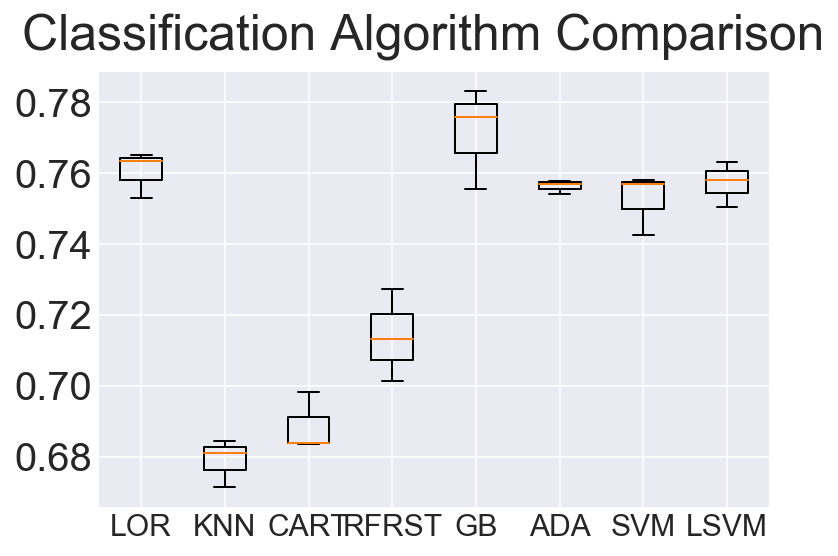

In [570]:
# Boxplot for classification algorithm comparison
fig = plt.figure()
fig.suptitle('Classification Algorithm Comparison', fontsize=25)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=15)
plt.show()


#### Try Logistic Regression Classifier

In [85]:
# cross validate on the best parameters. 
LOR_final =LogisticRegression(penalty='l1',C=0.068926121043496949, random_state=21)
LOR_final.fit(Xs_train, y_train)
scores = cross_val_score(LOR_final, Xs_train, y_train, cv=10)
print scores
print np.mean(scores)

[ 0.83884298  0.82730093  0.84074457  0.82936918  0.84384695  0.81780538
  0.81884058  0.80952381  0.83747412  0.81884058]
0.828258908118


In [86]:
# print the classification report
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.89      0.88      0.89      1658
          1       0.75      0.76      0.75       759

avg / total       0.84      0.84      0.84      2417



In [87]:
# look at TP, TN, FP, FN
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['early_adult', 'not_early_adult'],
                         columns=['predicted_early_adult','predicted_not_early_adult'])
confusion

predicted_early_adult  predicted_not_early_adult
early_adult      574                    185                      
not_early_adult  191                    1467

In [88]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.91056179882424182

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is early_adult', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [89]:
# zip together coefficients from the Logistic Regression model and its column names 
pd.DataFrame(LOR_final.coef_, columns=X.columns).T[0].sort_values(ascending=False)[:10] 
#sort_value is a string function, therefore we need to slice T[0] to sort it. 

NHSLDMEM        1.113373
OCCUPYYRANGE    0.875624
PCTYPE1         0.294460
TEMPNITE        0.268781
PLAYSTA1        0.267255
INWIRELESS      0.192999
WASHTEMP        0.164186
MOISTURE        0.140159
EDUCATION       0.133826
ELECDEV         0.119626
Name: 0, dtype: float64

In [90]:
# look at absolute value to see what is strongly negatively correlated
pd.DataFrame(LOR_final.coef_, columns=X.columns).T[0].apply(lambda x: abs(x)).sort_values(ascending=False)[:10]

NHSLDMEM        1.113373
OCCUPYYRANGE    0.875624
RETIREPY        0.652306
AGEHHMEMCAT2    0.638892
AGEHHMEMCAT4    0.353099
AGEHHMEMCAT5    0.295411
PCTYPE1         0.294460
TEMPNITE        0.268781
PLAYSTA1        0.267255
PCPRINT         0.253891
Name: 0, dtype: float64

#### Logistic Regression Summary

The best perfoming Logistic Regression model has a penalty': 'l1' (Lasso) and 'C': 0.068926121043496949. It scored 0.828258908118 from a 10-fold cross validation. 

Let's look at the top 10 positive and negative features from this Logistic Regression.
    
    NHSLDMEM        +1.113373 #Number of household members (0-15)
    OCCUPYYRANGE    +0.875624 #Year range when household moved in (Before 1950\n1950 to 1959\n1960 to 1969\
                          #n1970 to 1979\n1980 to 1989\n1990 to 1999\n2000 to 2004\n2005 to 2009)
    RETIREPY        -0.652306 #Household members received retirement income in 2009 (No\nYes)
    AGEHHMEMCAT2    -0.638892 #Age category of second household member
    AGEHHMEMCAT4    -0.353099 #Age category of fourth household member
    AGEHHMEMCAT5    -0.295411 #Age category of fifth household member
    PCTYPE1         +0.294460 #Most-used computer - desktop or laptop (Desktop\nLaptop\nNot Applicable)
    TEMPNITE        +0.268781 #Temperature at night (winter) (40 - 96)
    PLAYSTA1        -0.267255 #Video game console connected to the most-used TV (No\nYes\nNot Applicable)
    PCPRINT         -0.253891 #Number of printers used



#### Try Gradient Boosting Tree Classifier

In [91]:
# Used the best grid search parameters 
GB_final = GradientBoostingClassifier(learning_rate=.1, max_depth=5, min_samples_split=5, n_estimators=25)
GB_final.fit(Xs_train, y_train)
GB_final.score(Xs_test, y_test)


0.86677699627637572

In [92]:
GB_final.feature_importances_ 

array([  6.19099141e-03,   0.00000000e+00,   0.00000000e+00,
         1.53195532e-03,   1.34629116e-04,   2.69351303e-03,
         2.37931451e-03,   1.54619669e-03,   1.21637493e-03,
         9.05739389e-04,   2.00217120e-03,   0.00000000e+00,
         0.00000000e+00,   3.74423705e-03,   0.00000000e+00,
         1.94251412e-01,   8.43613307e-04,   4.74980582e-04,
         1.95693679e-03,   2.00022402e-03,   0.00000000e+00,
         1.17448975e-04,   7.79056309e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.81724759e-03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   3.09865008e-03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.55676294e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [93]:
pd.DataFrame(GB_final.feature_importances_).shape

(474, 1)

In [94]:
# zip up column names and the most impactful features. 
pd.DataFrame(zip(X.columns,GB_final.feature_importances_),columns=['feature', 'importance']).sort_values('importance', ascending=False)[:10]

feature  importance
15   OCCUPYYRANGE  0.194251  
361  AGEHHMEMCAT2  0.181194  
370  RETIREPY      0.118299  
356  SPOUSE        0.075769  
362  AGEHHMEMCAT3  0.057262  
360  NHSLDMEM      0.032164  
354  HHSEX         0.020719  
363  AGEHHMEMCAT4  0.020466  
185  NOCORD        0.017122  
68   COFFEE        0.016878

### Gradient Boosting Tree Classifier Summary

The best perfoming GradientBoost model scored 0.855162424995 and its best parameters are {'min_samples_split': 5, 'n_estimators': 25, 'learning_rate': 0.1, 'max_depth': 5}". 

Let's look at the top 10 features from the Gradient Boost model:


    feature	        importance
    -OCCUPYYRANGE	0.194233 Year range when household moved in
    -AGEHHMEMCAT2	0.178181 Age category of second household member
    -RETIREPY	    0.118490 Household members received retirement income in 2009
    -SPOUSE	        0.075952 Householder lives with spouse or partner
    -AGEHHMEMCAT3	0.054113 Age category of third household member
    -NHSLDMEM	    0.037180 Number of household members
    -AGEHHMEMCAT4	0.021279 Age category of fourth household member
    -HHSEX	        0.020800 Sex of householder
    -NOCORD	        0.017100 Cordless telephone used
    -COFFEE	        0.016626 Coffee maker used


### Create models after removing features that are logically correlated  to age¶
includes all types of energy use, behavior, ownernership, and all demographic information besides age

(From the EIA's RECS Presentation) RECS captures WHAT devices consume energy, HOW the
household consumes them, and HOW MUCH energy they
consume
Bill McNary, May 22, 2013 
    - Space Heating (Main and Secondary)
    - Air-Conditioning (Central and Room)
    - Water Heating
    - Appliances (Kitchen, Clothes Washing, etc)
    - Electronics (TVs, Set-top Boxes, PCs, etc)
    - Lighting and other uses 

In [347]:
#help - put housing things back in. Remove retirement pay.
# Remove features that are close indicators of age. 

sub_model = full_model.drop(['DOEID', 'TYPEHUQ' , 'OCCUPYYRANGE',
 'HDD65' ,'CDD65', 'HDD30YR', 'CDD30YR' ,'Climate_Region_Pub' ,'AIA_Zone',
 'YEARMADE', 'YEARMADERANGE' ,'OCCUPYYRANGE' ,'NUMFLRS' ,'NUMAPTS',
 'WALLTYPE' ,'ROOFTYPE' ,'STUDIO' ,'NAPTFLRS' ,'STORIES' ,'BEDROOMS' ,'NCOMBATH',
 'NHAFBATH' ,'OTHROOMS', 'TOTROOMS' ,'CELLAR' ,'CRAWL', 'CONCRETE' ,'BASEFIN',
 'FINBASERMS' ,'AGEHHMEMCAT2',
 'AGEHHMEMCAT3' ,'AGEHHMEMCAT4' ,'AGEHHMEMCAT5'], axis=1)

In [355]:
print sub_model.shape
sub_model.head()

(12083, 443)


REGIONC  DIVISION  REPORTABLE_DOMAIN       NWEIGHT  KOWNRENT  BASEHEAT  \
0  2        4         12                 2471.679705   1         1          
1  4        10        26                 8599.172010   2        -2          
2  1        1         1                  8969.915921   2        -2          
3  2        3         7                  18003.639600  1        -2          
4  1        1         1                  5999.605242   1         0          

   BASEHT2  BASECOOL  BASEUSE  ATTIC  ...    TOTALDOLWTH  TOTALDOLRFG  \
0  2        1         1        0      ...    211          108           
1 -2       -2        -2        0      ...    287          121           
2 -2       -2        -2       -2      ...    115          243           
3 -2       -2        -2        0      ...    179          159           
4 -2        0         1        0      ...    237          85            

   TOTALDOLOTH  KAVALEL  PERIODEL  SCALEEL  KAVALNG  PERIODNG  SCALENG  RURAL  
0  550          1        1         0       -2       -2        -2        0      
1  501          1        1         0        1        1         0        0      
2  339          1        1         0        3        5         3        0      
3  534          3        5         3        3        5         3        0      
4  620          1        1         0        1        1         0        0      

[5 rows x 443 columns]

In [356]:
# Set up X and y
X2 = sub_model.drop('HHAGE', axis=1)
y2 = pd.Series(np.where(np.logical_and(sub_model['HHAGE']>=20, sub_model['HHAGE']<=40),1,0))
print "number of early adulthood respondents:", y2.sum(), 'length of dataframe: ', len(y2)

number of early adulthood respondents: 3920 length of dataframe:  12083


In [357]:
# standardize
ss = StandardScaler()
X2s = ss.fit_transform(X2)

In [358]:
X2s_train, X2s_test, y2_train, y2_test = train_test_split(X2s, y2, test_size=0.20, random_state=42)

In [362]:
# cross validate on the best parameters. 
LOR_final2 =LogisticRegression(penalty='l1',C=0.086974900261778343, random_state=21)
LOR_final2.fit(X2s_train, y2_train)
scores = cross_val_score(LOR_final2, X2s_test, y2_test, cv=10)
print scores
print np.mean(scores)

[ 0.84710744  0.81818182  0.81818182  0.84710744  0.78512397  0.78099174
  0.81404959  0.77272727  0.80912863  0.79583333]
0.808843303842


In [370]:
# zip together coefficients from the Logistic Regression model and its column names 
pd.DataFrame(LOR_final2.coef_, columns=X2.columns).T[0].sort_values(ascending=False)[:15] 
#sort_value is a string function, therefore we need to slice T[0] to sort it. 

NHSLDMEM      0.421494
TEMPNITE      0.416550
PCTYPE1       0.341515
PLAYSTA1      0.296924
INWIRELESS    0.240084
WASHTEMP      0.239433
MOISTURE      0.183335
EDUCATION     0.158506
FOODASST      0.149118
PLAYSTA3      0.147746
NUMFRIG       0.140970
TVSIZE2       0.136732
BASEUSE       0.132806
PGASHEAT      0.130252
TOASTER       0.125878
Name: 0, dtype: float64

In [369]:
# look at absolute value to see what is strongly negatively correlated
pd.DataFrame(LOR_final2.coef_, columns=X2.columns).T[0].apply(lambda x: abs(x)).sort_values(ascending=False)[:15]

RETIREPY      0.844735
NHSLDMEM      0.421494
TEMPNITE      0.416550
PCTYPE1       0.341515
PCPRINT       0.329735
PLAYSTA1      0.296924
DVR1          0.243497
INWIRELESS    0.240084
WASHTEMP      0.239433
COFFEE        0.230859
AGEINS        0.222331
NOCORD        0.221528
VCR1          0.215093
RNSETEMP      0.190987
MOISTURE      0.183335
Name: 0, dtype: float64

### Logistic Regression summary
 (after removing demographic features and features that are logically correlated  to age)
 
The best perfoming Logistic Regression model has a penalty': 'l1' (Lasso) and 'C': 0.086974900261778343. It scored 0.79601622601 from a 10-fold cross validation.


Let's look at the top 15 positive and negative features from this Logistic Regression.

    RETIREPY      -0.844735 Household members received retirement income in 2009
    NHSLDMEM      +0.421494 Number of household members
    TEMPNITE      +0.416550 Temperature at night (winter) [my clarification- external temperature]
    PCTYPE1       +0.341515 Most-used computer - desktop or laptop
    PCPRINT       -0.329735 Number of printers used
    PLAYSTA1      +0.296924 Video game console connected to the most-used TV
    DVR1          -0.243497 DVR built into the cable box or satellite box connected to the most-used TV
    INWIRELESS    +0.240084 Wireless internet in home
    WASHTEMP      +0.239433 Water temperature used for clothes washer wash cycle
    COFFEE        -0.230859 Coffee maker used
    AGEINS        -0.222331 Year of added insulation
    NOCORD        -0.221528 Cordless telephone used
    VCR1          -0.215093 VCR connected to the most-used TV
    RNSETEMP      -0.190987 Water temperature used for clothes washer rinse cycle
    MOISTURE      +0.183335 Number of months humidifier used in 2009


In [366]:
## convert cell to code to run
print "Intrepret the results"
"Grid Search best score is {} and best parameters are {}".format(gs_GB.best_score_,gs_GB.best_params_)

Intrepret the results


"Grid Search best score is 0.78967515001 and best parameters are {'min_samples_split': 10, 'n_estimators': 25, 'learning_rate': 0.1, 'max_depth': 5}"

In [371]:
GB_final2 = GradientBoostingClassifier(learning_rate=.1, max_depth=5, min_samples_split=10, n_estimators=25)
GB_final2.fit(X2s_train, y2_train)
GB_final2.score(X2s_test, y2_test)


0.80099296648738105

In [373]:
GB_final2.feature_importances_ 
# zip up column names and the most impactful features. 
pd.DataFrame(zip(X2.columns,GB_final2.feature_importances_),columns=['feature', 'importance']).sort_values('importance', ascending=False)[:15]

feature  importance
338  RETIREPY      0.230389  
332  NHSLDMEM      0.080485  
157  NOCORD        0.040628  
158  ANSMACH       0.027455  
258  AGEINS        0.027424  
88   PLAYSTA1      0.024546  
40   COFFEE        0.022535  
86   DVR1          0.021139  
346  HUPROJ        0.018638  
261  AGEWS         0.018485  
130  PCTYPE1       0.016951  
46   AGERFRI1      0.015683  
97   TVONWEWATCH1  0.015647  
347  RENTHELP      0.014680  
327  EMPLOYHH      0.014412

### Gradient Boosting Tree summary
The Gradient Boosting model's best parameters are {'min_samples_split': 10, 'n_estimators': 25, 'learning_rate': 0.1, 'max_depth': 5}" It scored 0.78967515001.

Let's look at the top 15 positive and negative features from this Gradient Boosting Tree Classifier.    
    
    feature	importance
    WORKPAY	0.057633 Household members received employment income in 2009
    NOCORD	0.053320 Cordless telephone used
    RENTHELP	0.045655 Lower rent due to Federal, State, or Local housing program
    TVONWEWATCH1	0.042975 Most-used TV weekend usage spent playing video games
    ANSMACH	0.038417 Answering machine used
    ELECDEV	0.037686 Number of rechargeable electronic devices used
    AGEINS	0.034783 Year of added insulation
    TVONWDWATCH1	0.034567 Most-used TV weekday usage spent playing video games
    COFFEE	0.032127 Coffee maker used
    HUPROJ	0.030957 Housing unit in public housing authority	

"The average gamer is 35 years old and 72 percent are age 18 or older...
Adult women represent a greater portion of the video game-playing population (31 percent) than boys under age 18 (18 percent)." - from Entertainment Software Association

"47 percent of gamers are between 18 and 49 years old." Entertainment Software Association https://www.polygon.com/2016/4/29/11539102/gaming-stats-2016-esa-essential-facts

Insights from interviewing some young adults- Video game console users came into discretionary income in their 20's-40's, in a time when consoles were still popular. Although between 2009-2012 consoles were in the decline and mobile gaming was becoming more popular, this age range still had an affinity for the traditional mode of gaming. This insight may not be as applicable to the next set of RECS data (from 2015-2018) as video gaming popularity continue to decline. 

In [374]:
# set up features so that they can easily be used in subsets. 

for i in sub_model.columns.values:
    print("'{}',".format(i))

'REGIONC',
'DIVISION',
'REPORTABLE_DOMAIN',
'NWEIGHT',
'KOWNRENT',
'BASEHEAT',
'BASEHT2',
'BASECOOL',
'BASEUSE',
'ATTIC',
'ATTICFIN',
'ATTCHEAT',
'ATTCCOOL',
'ATTICUSE',
'PRKGPLC1',
'SIZEOFGARAGE',
'GARGLOC',
'GARGHEAT',
'GARGCOOL',
'PRKGPLC2',
'SIZEOFDETACH',
'OUTLET',
'STOVEN',
'STOVENFUEL',
'STOVE',
'STOVEFUEL',
'OVEN',
'OVENFUEL',
'OVENUSE',
'OVENCLN',
'TYPECLN',
'MICRO',
'AMTMICRO',
'DEFROST',
'OUTGRILL',
'OUTGRILLFUEL',
'TOPGRILL',
'TOASTER',
'NUMMEAL',
'FUELFOOD',
'COFFEE',
'NUMFRIG',
'TYPERFR1',
'SIZRFRI1',
'REFRIGT1',
'ICE',
'AGERFRI1',
'ESFRIG',
'REPLCFRI',
'HELPFRI',
'TYPERFR2',
'SIZRFRI2',
'REFRIGT2',
'MONRFRI2',
'AGERFRI2',
'ESFRIG2',
'SEPFREEZ',
'NUMFREEZ',
'UPRTFRZR',
'SIZFREEZ',
'FREEZER',
'AGEFRZR',
'DISHWASH',
'DWASHUSE',
'AGEDW',
'ESDISHW',
'REPLCDW',
'HELPDW',
'CWASHER',
'TOPFRONT',
'WASHLOAD',
'WASHTEMP',
'RNSETEMP',
'AGECWASH',
'ESCWASH',
'REPLCCW',
'HELPCW',
'DRYER',
'DRYRFUEL',
'DRYRUSE',
'AGECDRYER',
'TVCOLOR',
'TVSIZE1',
'TVTYPE1',
'CABLESAT1',
'COMBODVR1',
'D

In [107]:
sub_model.shape

(12083, 431)

### Create models after selecting features that represent energy use¶

In [427]:
# slice dataframe and review by batches of 25 features
batch1 = energy_model.iloc[:,250:278]

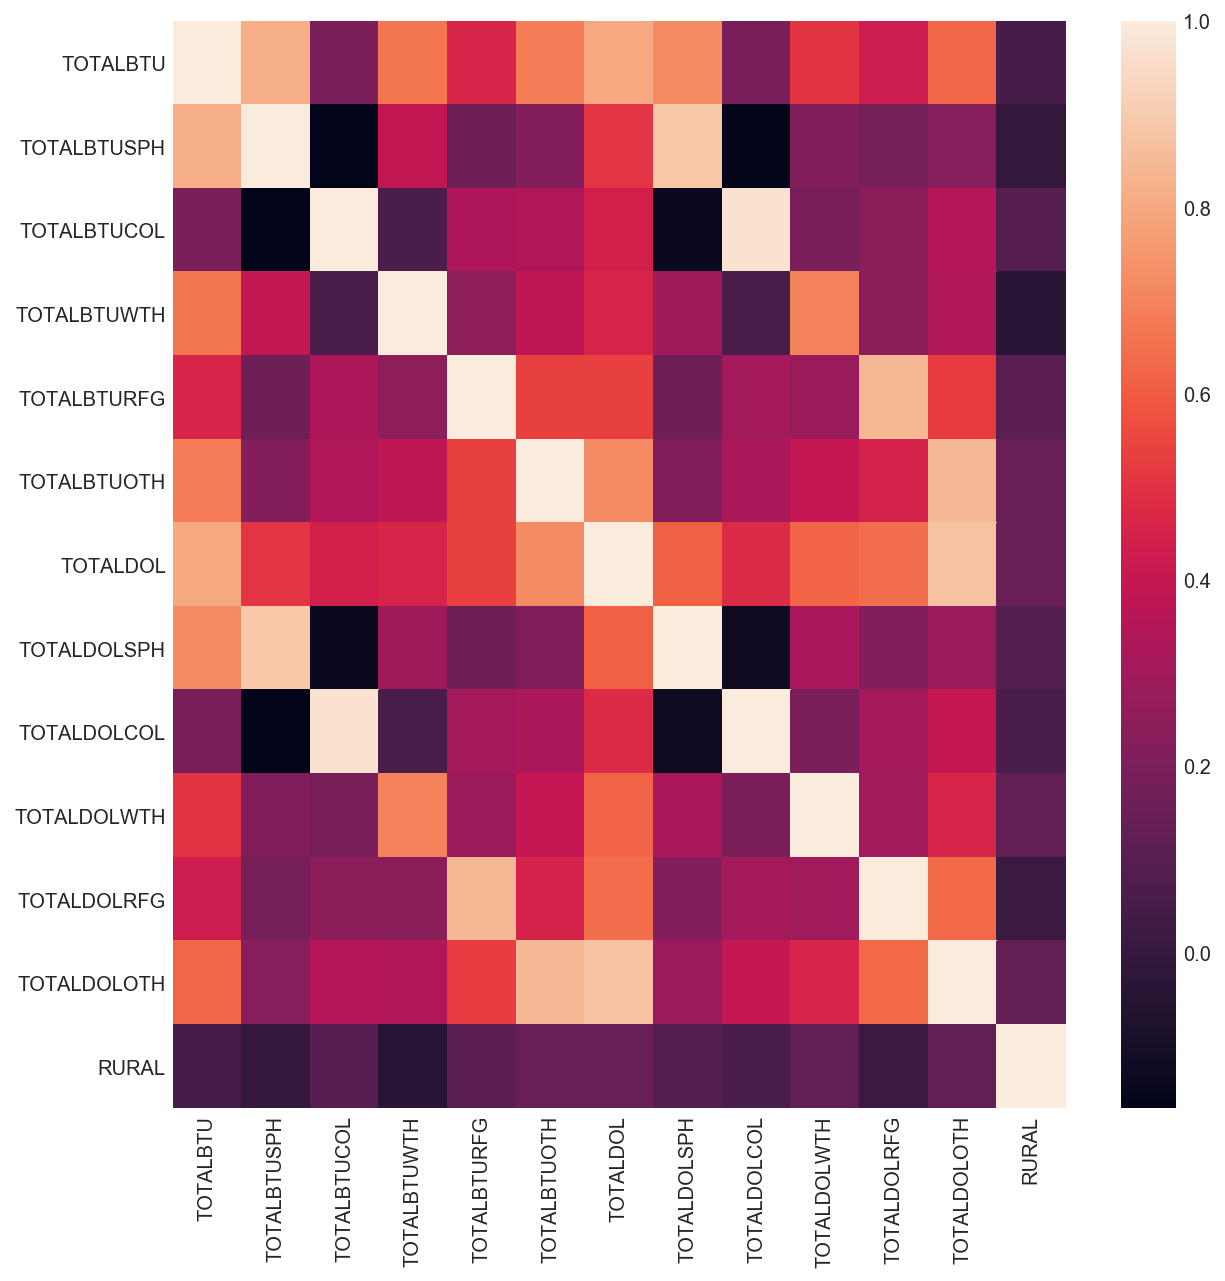

In [428]:
# look at each batch
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(batch1.corr())


In [431]:
'''
Create model using only features that represent energy; remove high collinearity. Collinear features include: 
'BASEHT2', 'BASECOOL' ,'BASEUSE', 'OVENFUEL','STOVEFUEL','CHRGPLGT','REVERSE','WARMAIR','STEAMR',
'PERMELEC', 'PIPELESS' ,'ROOMHEAT', 'WOODKILN','CARRYKER','DIFEQUIP','TEMPGONE','AUTOCOOLDAY','TEMPHOMEAC','NUMBERAC',
'NOTMOIST', 'SLDDRS','USEEL','UGWARM','WOODAUX','SOLARAUX','OTHERAUX','WDSCRAP', 'WDPELLET', 'WDOTHER', 'WOODAMT',
'BTUEL','BTUELSPH', 'BTUELCOL' ,'BTUELWTH','BTUELRFG','BTUELOTH','CUFEETNGSPH', 'CUFEETNGWTH' ,'CUFEETNGOTH', 
'BTUNG', 'BTUNGSPH', 'BTUNGWTH', 'BTUNGOTH','GALLONLPSPH','BTULPSPH','DOLLPSPH','BTUFO','BTUFOSPH','DOLFOSPH',              
'GALLONKERSPH','BTUKERSPH','BTUKERSPH', 'BTUKERWTH', 'BTUKEROTH','DOLLARKER', 'DOLKERSPH', 'DOLKERWTH','DOLKEROTH',
'BTUWOOD','TOTALBTUCOL' 
'''

#Drop non-energy features
energy_model = sub_model.drop(['ATTIC',
'ATTICFIN','ATTICUSE','PRKGPLC1','SIZEOFGARAGE','GARGLOC','PRKGPLC2','SIZEOFDETACH','OUTLET','STOVEN','STOVE','OVEN','OVENUSE','OVENCLN',
'TYPECLN','MICRO','AMTMICRO','DEFROST','OUTGRILL','TOPGRILL','TOASTER','NUMMEAL','COFFEE','NUMFRIG','TYPERFR1',
'SIZRFRI1',
'REFRIGT1',
'ICE',
'AGERFRI1',
'REPLCFRI',
'HELPFRI',
'TYPERFR2',
'SIZRFRI2',
'REFRIGT2',
'MONRFRI2',
'AGERFRI2',
'SEPFREEZ',
'NUMFREEZ',
'UPRTFRZR',
'SIZFREEZ',
'FREEZER',
'AGEFRZR',
'DISHWASH',
'DWASHUSE',
'AGEDW',
'REPLCDW',
'HELPDW',
'CWASHER',
'TOPFRONT',
'WASHLOAD',
'WASHTEMP',
'RNSETEMP',
'AGECWASH',
'REPLCCW',
'HELPCW',
'DRYER',
'DRYRUSE',
'AGECDRYER',
'TVCOLOR',
'TVSIZE1',
'CABLESAT1',
'COMBODVR1',
'DVR1',
'DIGITSTB1',
'PLAYSTA1',
'COMBOVCRDVD1',
'VCR1',
'DVD1',
'TVAUDIOSYS1',
'OTHERSTB1',
'TVONWD1',
'TVONWDWATCH1',
'TVONWE1',
'TVONWEWATCH1',
'TVSIZE2',
'TVTYPE2',
'CABLESAT2',
'COMBODVR2',
'DVR2',
'DIGITSTB2',
'PLAYSTA2',
'COMBOVCRDVD2',
'VCR2',
'DVD2',
'TVAUDIOSYS2',
'OTHERSTB2',
'TVONWD2',
'TVONWDWATCH2',
'TVONWE2',
'TVONWEWATCH2',
'TVSIZE3',
'TVTYPE3',
'CABLESAT3',
'COMBODVR3',
'DVR3',
'DIGITSTB3',
'PLAYSTA3',
'COMBOVCRDVD3',
'VCR3',
'DVD3',
'TVAUDIOSYS3',
'OTHERSTB3',
'TVONWD3',
'TVONWE3',
'COMPUTER',
'NUMPC',
'PCTYPE1',
'MONITOR1',
'TIMEON1',
'PCTYPE2',
'MONITOR2',
'TIMEON2',
'PCTYPE3',
'TIMEON3',
'INTERNET',
'INDIALUP',
'INDSL',
'INCABLE',
'INSATEL',
'INWIRELESS',
'PCPRINT',
'FAX',
'COPIER',
'WELLPUMP',
'AQUARIUM',
'STEREO',
'NOCORD',
'ANSMACH',
'NUMTHERM',
'TEMPNITE',
'HELPWH',
'HELPCAC',
'TEMPNITEAC',
'HIGHCEIL',
'CATHCEIL',
'SWIMPOOL',
'RECBATH',
'HELPCFL',
'HELPWIN',
'INSTLINS',
'AGEINS',
'HELPWS',
'KFUELOT',
'HBUSNESS',
'ATHOME',
'TELLWORK',
'OTHWORK',
'HUPROJ',
'RENTHELP',
'FOODASST',
'TOTSQFT',
'TOTSQFT_EN',
'TOTHSQFT',
'TOTUSQFT',
'TOTCSQFT',
'TOTUCSQFT',
'DOLLARNG',
'DOLNGSPH',
'DOLNGWTH',
'DOLNGOTH',
'KAVALEL',
'PERIODEL',
'SCALEEL',
'KAVALNG',
'PERIODNG',
'SCALENG','BASEHT2', 'BASECOOL' ,'BASEUSE', 'OVENFUEL','STOVEFUEL','CHRGPLGT','REVERSE','WARMAIR','STEAMR',
'PERMELEC', 'PIPELESS' ,'ROOMHEAT', 'WOODKILN','CARRYKER','DIFEQUIP','TEMPGONE','AUTOCOOLDAY','TEMPHOMEAC','NUMBERAC',
'NOTMOIST', 'SLDDRS','USEEL','UGWARM','WOODAUX','SOLARAUX','OTHERAUX','WDSCRAP', 'WDPELLET', 'WDOTHER', 'WOODAMT',
'BTUEL','BTUELSPH', 'BTUELCOL' ,'BTUELWTH','BTUELRFG','BTUELOTH','CUFEETNGSPH', 'CUFEETNGWTH' ,'CUFEETNGOTH', 
'BTUNG', 'BTUNGSPH', 'BTUNGWTH', 'BTUNGOTH','GALLONLPSPH','BTULPSPH','DOLLPSPH','BTUFO','BTUFOSPH','DOLFOSPH',              
'GALLONKERSPH','BTUKERSPH','BTUKERSPH', 'BTUKERWTH', 'BTUKEROTH','DOLLARKER', 'DOLKERSPH', 'DOLKERWTH','DOLKEROTH',
'BTUWOOD','TOTALBTUCOL'  ], axis=1)

In [432]:
print energy_model.shape
print energy_model.columns.values

(12083, 218)
['REGIONC' 'DIVISION' 'REPORTABLE_DOMAIN' 'NWEIGHT' 'KOWNRENT' 'BASEHEAT'
 'ATTCHEAT' 'ATTCCOOL' 'GARGHEAT' 'GARGCOOL' 'STOVENFUEL' 'OUTGRILLFUEL'
 'FUELFOOD' 'ESFRIG' 'ESFRIG2' 'ESDISHW' 'ESCWASH' 'DRYRFUEL' 'TVTYPE1'
 'PCONOFF1' 'PCSLEEP1' 'PCONOFF2' 'PCSLEEP2' 'PCONOFF3' 'DIPSTICK'
 'SWAMPCOL' 'BATTOOLS' 'BATCHRG' 'ELECDEV' 'ELECCHRG' 'CHRGPLGE' 'HEATHOME'
 'EQUIPM' 'FUELHEAT' 'MAINTHT' 'EQUIPAGE' 'REPLCHT' 'HELPHT' 'HEATOTH'
 'EQUIPAUX' 'CARRYEL' 'CHIMNEY' 'FPFUEL' 'RANGE' 'EQMAMT' 'HEATROOM'
 'THERMAIN' 'PROTHERM' 'AUTOHEATNITE' 'AUTOHEATDAY' 'TEMPHOME' 'MOISTURE'
 'USEMOISTURE' 'NUMH2ONOTNK' 'NUMH2OHTRS' 'H2OTYPE1' 'FUELH2O' 'WHEATOTH'
 'WHEATSIZ' 'WHEATAGE' 'WHEATBKT' 'AIRCOND' 'DNTAC' 'COOLTYPE' 'CENACHP'
 'ACOTHERS' 'MAINTAC' 'AGECENAC' 'REPLCCAC' 'ACROOMS' 'USECENAC'
 'THERMAINAC' 'PROTHERMAC' 'AUTOCOOLNITE' 'TEMPGONEAC' 'WWACAGE' 'ESWWAC'
 'USEWWAC' 'NUMCFAN' 'USECFAN' 'TREESHAD' 'USENOTMOIST' 'LGT12' 'LGT12EE'
 'LGT4' 'LGT4EE' 'LGT1' 'LGT1EE' 'NOUTLGTNT' 'LGTOE

In [433]:
# Set up X and y
X3 = energy_model.drop('HHAGE', axis=1)
y3 = pd.Series(np.where(np.logical_and(energy_model['HHAGE']>=20, energy_model['HHAGE']<=40),1,0))
print "number of early adulthood respondents:", y3.sum(), 'length of dataframe: ', len(y3)

number of early adulthood respondents: 3920 length of dataframe:  12083


In [434]:
# standardize and train-test-split
ss = StandardScaler()
X3s = ss.fit_transform(X3)

X3s_train, X3s_test, y3_train, y3_test = train_test_split(X3s, y3, test_size=0.20, random_state=42)

In [441]:
# cross validate on the best parameters. 
LOR_final3 =LogisticRegression(penalty='l2',C=0.0047508101621027985, random_state=21)
LOR_final3.fit(X3s_train, y3_train)
scores = cross_val_score(LOR_final3, X3s_test, y3_test, cv=10)
print scores
print np.mean(scores)

[ 0.79752066  0.7892562   0.80578512  0.74380165  0.76859504  0.72727273
  0.7768595   0.74380165  0.76763485  0.75833333]
0.767886075009


In [439]:
# zip together coefficients from the Logistic Regression model and its column names 
pd.DataFrame(LOR_final3.coef_, columns=X3.columns).T[0].sort_values(ascending=False)[:20] 
#sort_value is a string function, therefore we need to slice T[0] to sort it. 

NHSLDMEM            0.368937
KOWNRENT            0.230687
NEWGLASS            0.182678
EDUCATION           0.156323
WORKPAY             0.155237
MOISTURE            0.149368
ELECDEV             0.136670
PCSLEEP1            0.114620
EMPLOYHH            0.112802
TEMPHOME            0.091395
SDESCENT            0.091302
PGASHEAT            0.085735
CHRGPLGE            0.079287
TVTYPE1             0.077590
DOLELSPH            0.076688
PCONOFF1            0.075000
Householder_Race    0.074275
TEMPGONEAC          0.064906
POVERTY100          0.060853
DOLFOWTH            0.056139
Name: 0, dtype: float64

In [491]:
# look at absolute value to see what is strongly negatively correlated
LOR_results = pd.DataFrame(LOR_final3.coef_, columns=X3.columns).T[0].apply(lambda x: abs(x)).sort_values(ascending=False)
LOR_results[:20]

RETIREPY     0.658209
NHSLDMEM     0.368937
KOWNRENT     0.230687
NEWGLASS     0.182678
EDUCATION    0.156323
WORKPAY      0.155237
INVESTMT     0.150929
MOISTURE     0.149368
AGEWS        0.143811
ELECDEV      0.136670
NUMCFAN      0.124761
PCSLEEP1     0.114620
EMPLOYHH     0.112802
HEATROOM     0.109480
WHEATBKT     0.104041
SSINCOME     0.101604
INSTLWS      0.098202
AUDIT        0.095745
WINDOWS      0.095596
LPGDELV      0.092824
Name: 0, dtype: float64

Text(0.5,1,u'most predictive features')

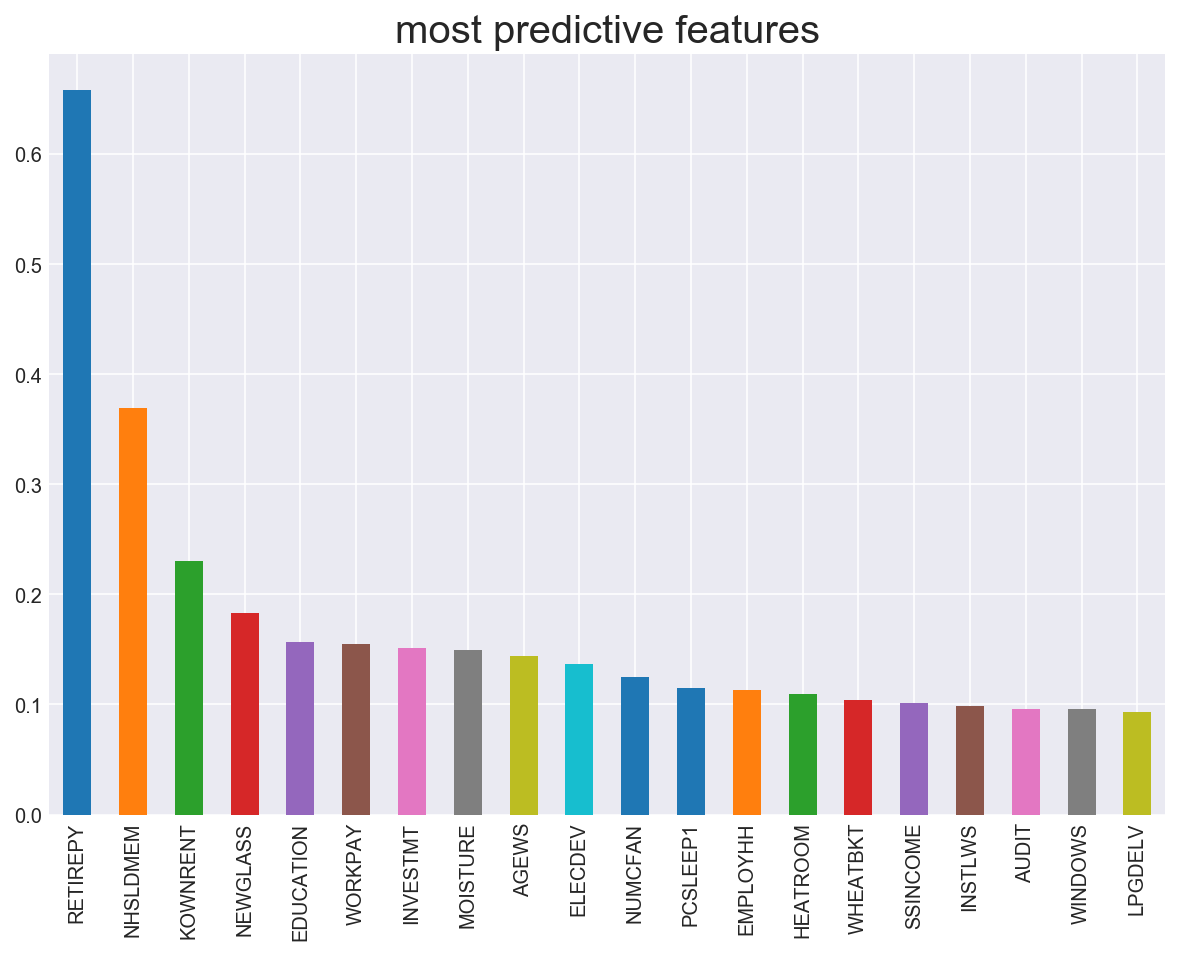

In [493]:
fig, ax = plt.subplots(figsize=(10,7))

LOR_results[:20].plot(kind='bar', ax=ax)
ax.set_title('most predictive features', fontsize=20)
#x_labels = LOR_results['feature']
#ax.set_xticklabels(x_labels, rotation=70,fontsize=15)

      HHAGE   ELECDEV
0  (10, 20]  1.583333
1  (20, 30]  1.548817
2  (30, 40]  1.616895
3  (40, 50]  1.606987
4  (50, 60]  1.411363
5  (60, 70]  1.180622
6  (70, 80]  0.925813
7  (80, 90]  0.659247


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

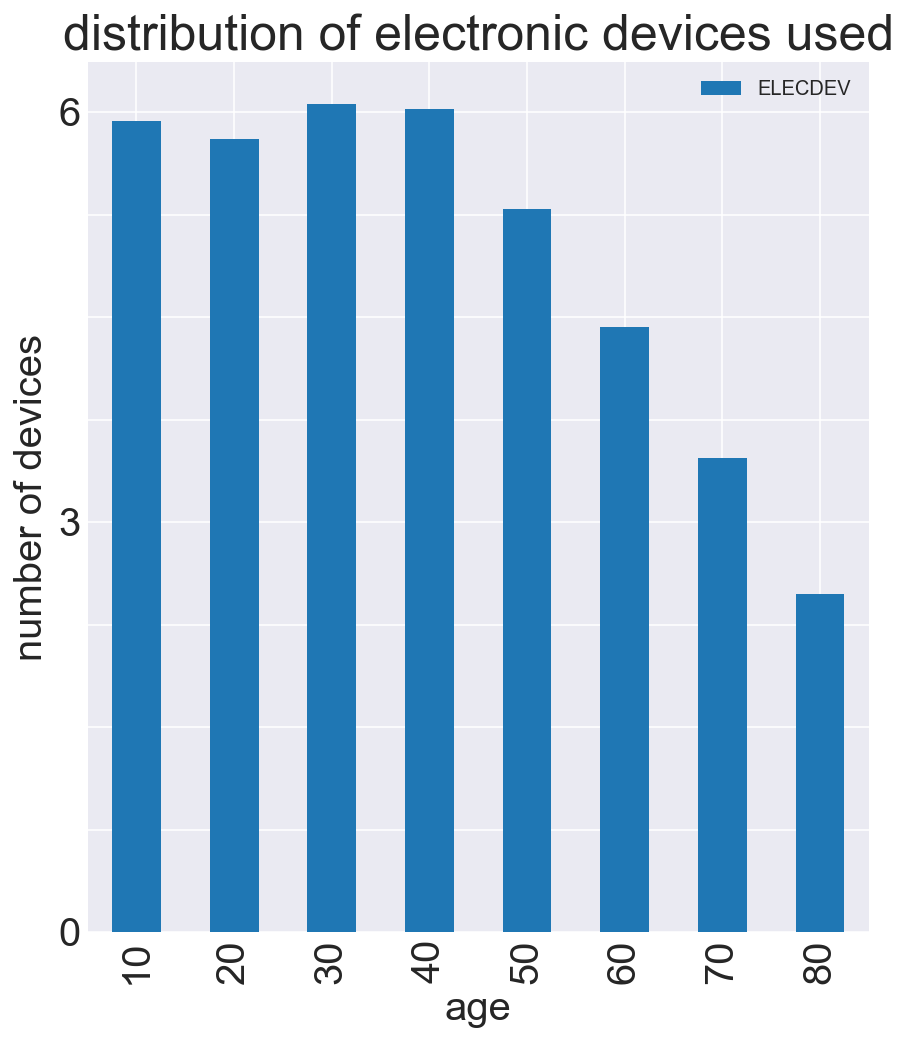

In [558]:
# Look at the distribution of income over age brackets
elecdev = RECS[['ELECDEV']].groupby(pd.cut(RECS['HHAGE'], np.arange(10,90+10,10))).mean().reset_index()\

print elecdev


fig, ax = plt.subplots(figsize=(7,8))

elecdev.plot(kind='bar', ax=ax)
ax.set_title('distribution of electronic devices used', fontsize=25)
ax.set_xlabel('age', fontsize=20)
ax.set_ylabel('number of devices', fontsize=20)
x_labels= ('10','20','30','40','50','60','70','80','90')
ax.set_xticklabels(x_labels,fontsize=20)
y_labels = (0,'','','', 3,'','','',6 ) #help - make the y-axis more evently distributed
ax.set_yticklabels(y_labels,fontsize=20)
#ax.yaxis.label.set_size(20)
ylabels = ()
plt.setp(ax.get_yticklabels(), fontsize=20)



overlap in both 

RETIREPY    - 0.658209 Household members received retirement income in 2009
NHSLDMEM    + 0.368937 Number of household members
KOWNRENT    + 0.230687 Housing unit is owned, rented, or occupied without payment of rent	
NEWGLASS    + 0.182678 Windows replaced by this household
EDUCATION   + 0.156323 Highest education completed by householder

INVESTMT    - 0.150929 Household members received investment income in 2009
MOISTURE    + 0.149368 Humidifier used
AGEWS       - 0.143811 Year of caulking or weather stripping
ELECDEV     + 0.136670 Number of rechargeable electronic devices used
EMPLOYHH    + 0.112802 Employment status of householder
HEATROOM    - 0.109480 Number of rooms heated



SSINCOME    - 0.101604 Household members received Supplemental Security income in 2009


In [563]:
RECS['NEWGLASS'].value_counts()

 3    8299
 2    1951
 1    1764
-2    69  
Name: NEWGLASS, dtype: int64

KOWNRENT     1     2   3
HHAGE                   
(10, 20]  30    112   2 
(20, 30]  572   1048  29
(30, 40]  1321  843   26
(40, 50]  1798  699   22
(50, 60]  1819  494   28
(60, 70]  1354  306   12
(70, 80]  801   173   10
(80, 90]  445   126   13


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

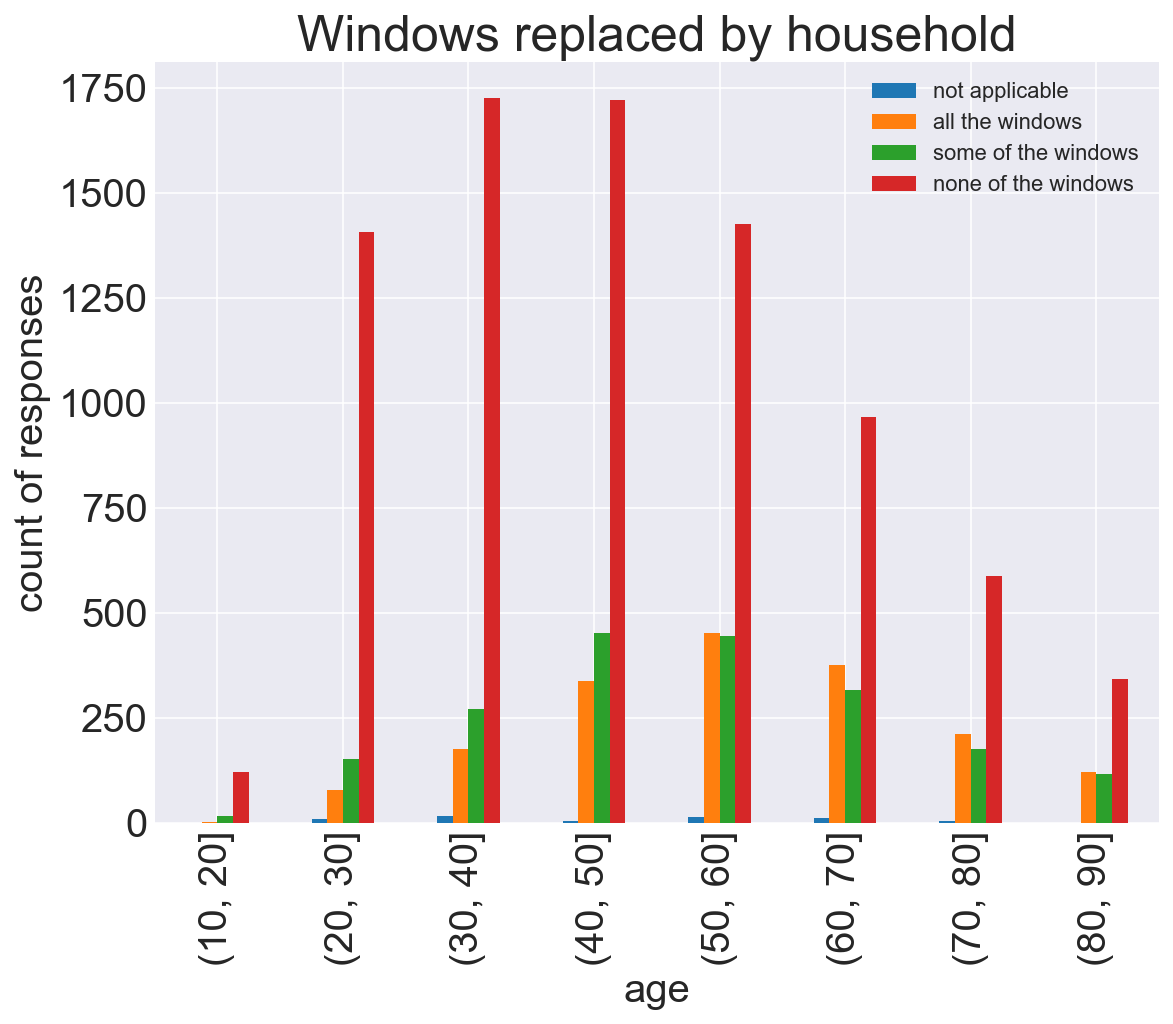

In [566]:
## windows replaced by this household
#(1)All of the windows; (2)Some of the windows; (3)None of the windows; (4) Not Applicable
newglass =RECS.groupby([pd.cut(RECS['HHAGE'], np.arange(10,90+10,10)),'NEWGLASS']).size().unstack(fill_value=0)
print ownership

fig, ax = plt.subplots(figsize=(9,7))
newglass.plot(kind='bar', ax=ax)
ax.set_title('Windows replaced by household', fontsize=25)
ax.set_xlabel('age', fontsize=20)
ax.set_ylabel('count of responses', fontsize=20)
ax.legend(('not applicable','all the windows', 'some of the windows', 'none of the windows'), fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)

### Logistic Regression summary - update features
 (after removing collinear features and features unrelated to energy and/or behavior)
 
 'penalty': 'l2', 'C': 0.0047508101621027985
 
The best perfoming Logistic Regression model has a penalty': 'l2' (Ridge) and 'C': 0.0047508101621027985. It scored 0.767886075009 from a 10-fold cross validation.

Let's look at the top 20 positive and negative features from this Logistic Regression.

    RETIREPY    - 0.658209 Household members received retirement income in 2009
    NHSLDMEM    + 0.368937 Number of household members
    KOWNRENT    + 0.230687 Housing unit is owned, rented, or occupied without payment of rent	
    NEWGLASS    + 0.182678 Windows replaced by this household
    EDUCATION   + 0.156323 Highest education completed by householder
    WORKPAY     + 0.155237 Household members received employment income in 2009
    INVESTMT    - 0.150929 Household members received investment income in 2009
    MOISTURE    + 0.149368 Humidifier used
    AGEWS       - 0.143811 Year of caulking or weather stripping
    ELECDEV     + 0.136670 Number of rechargeable electronic devices used
    NUMCFAN     - 0.124761 Number of ceiling fans used
    PCSLEEP1    + 0.114620 Sleep or standby mode for most-used computer when not in use
    EMPLOYHH    + 0.112802 Employment status of householder
    HEATROOM    - 0.109480 Number of rooms heated
    WHEATBKT    - 0.104041 Blanket around the main water heater (if storage tank)
    SSINCOME    - 0.101604 Household members received Supplemental Security income in 2009
    INSTLWS     - 0.098202 Caulking or weather stripping by this household
    AUDIT       - 0.095745 Home energy audit
    WINDOWS     - 0.095596 Number of windows in heated areas
    LPGDELV     - 0.092824 Propane delivered

   

### Try Gradient Boosting Tree Classifier

In [445]:
GB_final3 = GradientBoostingClassifier(learning_rate=.1, max_depth=5, min_samples_split=2, n_estimators=25)
GB_final3.fit(X3s_train, y3_train)
GB_final3.score(X3s_test, y3_test)

0.7782374844848986

In [551]:
# zip up column names and the most impactful features. 
GB_results =pd.DataFrame(zip(X3.columns,GB_final3.feature_importances_),columns=['feature', 'importance']).sort_values('importance', ascending=False)

GB_results.head(20)

feature  importance
161  RETIREPY     0.281459  
159  NHSLDMEM     0.093944  
4    KOWNRENT     0.062533  
99   AGEWS        0.039059  
95   NEWGLASS     0.029721  
13   ESFRIG       0.027378  
209  TOTALBTUOTH  0.023905  
45   HEATROOM     0.021900  
28   ELECDEV      0.021362  
154  EMPLOYHH     0.017393  
174  KWHOTH       0.014639  
164  INVESTMT     0.014261  
158  EDUCATION    0.013761  
88   NOUTLGTNT    0.012799  
210  TOTALDOL     0.011002  
51   MOISTURE     0.010419  
3    NWEIGHT      0.010294  
162  SSINCOME     0.010202  
207  TOTALBTUWTH  0.009767  
52   USEMOISTURE  0.009558

[Text(0,0,u'RETIREPY'),
 Text(0,0,u'NHSLDMEM'),
 Text(0,0,u'KOWNRENT'),
 Text(0,0,u'AGEWS'),
 Text(0,0,u'NEWGLASS'),
 Text(0,0,u'ESFRIG'),
 Text(0,0,u'TOTALBTUOTH'),
 Text(0,0,u'HEATROOM'),
 Text(0,0,u'ELECDEV'),
 Text(0,0,u'EMPLOYHH'),
 Text(0,0,u'KWHOTH'),
 Text(0,0,u'INVESTMT'),
 Text(0,0,u'EDUCATION'),
 Text(0,0,u'NOUTLGTNT'),
 Text(0,0,u'TOTALDOL'),
 Text(0,0,u'MOISTURE'),
 Text(0,0,u'NWEIGHT'),
 Text(0,0,u'SSINCOME'),
 Text(0,0,u'TOTALBTUWTH'),
 Text(0,0,u'USEMOISTURE')]

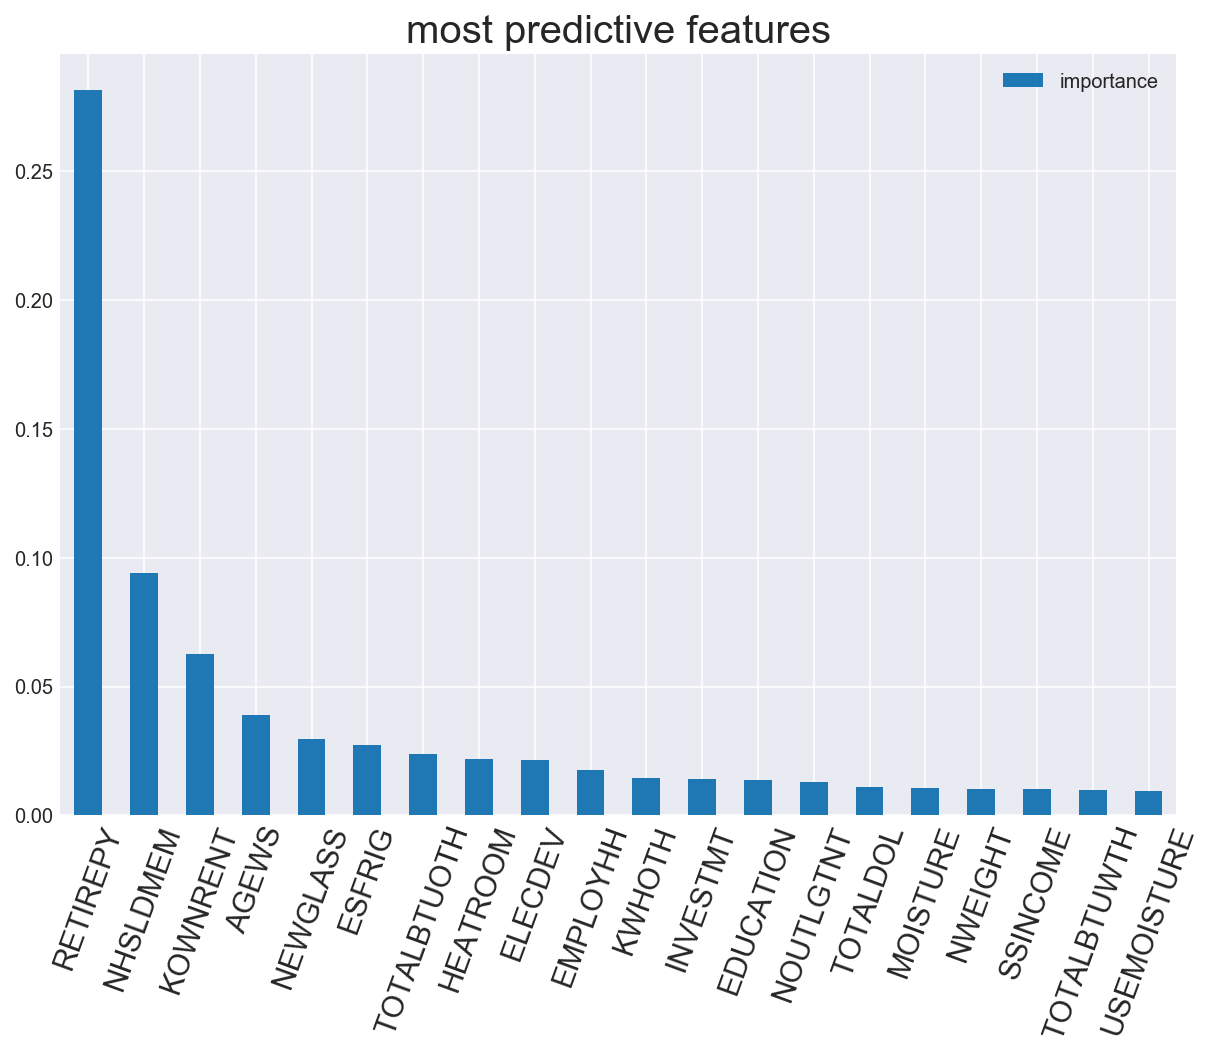

In [449]:
fig, ax = plt.subplots(figsize=(10,7))

gb_results[:20].plot(kind='bar', ax=ax)
ax.set_title('most predictive features', fontsize=20)
x_labels = gb_results['feature']
ax.set_xticklabels(x_labels, rotation=70,fontsize=15)

### Gradient Boosting Tree summary    -- update this

The Gradient Boosting model's best parameters are {'min_samples_split': 2, 'n_estimators': 25, 'learning_rate': 0.1, 'max_depth': 5}" It scored 0.7782374844848986.



Let's look at the top 20 features from this Gradient Boosting Tree Classifier.  

         feature	importance
    161	RETIREPY	0.281459 Household members received retirement income in 2009
    159	NHSLDMEM	0.093944 Number of household members
    4	KOWNRENT	0.062533 Housing unit is owned, rented, or occupied without payment of rent
    99	AGEWS       0.039059 Year of caulking or weather stripping
    95	NEWGLASS	0.029721 Windows replaced by this household 
    13	ESFRIG	    0.027378 Energy Star most-used refrigerator
    209	TOTALBTUOTH	0.023905 Total usage for space heating, in thousand BTU,
    45	HEATROOM	0.021900 Number of rooms heated	
    28	ELECDEV	    0.021362 Number of rechargeable electronic devices used
    154	EMPLOYHH	0.017393 Employment status of householder
    174	KWHOTH	    0.014639 Electricity usage for other purposes (all end-uses except SPH, COL, WTH, and RFG)
    164	INVESTMT	0.014261 Household members received investment income in 2009
    158	EDUCATION	0.013761 Highest education completed by householder
    88	NOUTLGTNT	0.012799 Number of outdoor lights left on all night
    210	TOTALDOL	0.011002 Total cost[for space heating, air conditioning, water heating, refrigerators, misc]
    51	MOISTURE	0.010419 Number of months humidifier used
    3	NWEIGHT	    0.010294 Final sample weight
    162	SSINCOME	0.010202 Household members received Supplemental Security income in 2009
    207	TOTALBTUWTH	0.009767 Total usage for water heating, in thousand BTU
    52	USEMOISTURE	0.009558 Number of months humidifier used

### Try clustering

At this point, I'm not seeing much from my data with regard to energy usage. I'd like to now take a look at clusters of data to see if there are any noticable associations between the features. 

#### Try DB Scan

In [ ]:
'''
- use cluster as eda
mean of all features
-cluster 1 - look at how those means change
- throw age back in
- keep some demographic information to leave myself breadcrumbs
- try dbscan
'''




In [450]:
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.metrics import silhouette_score

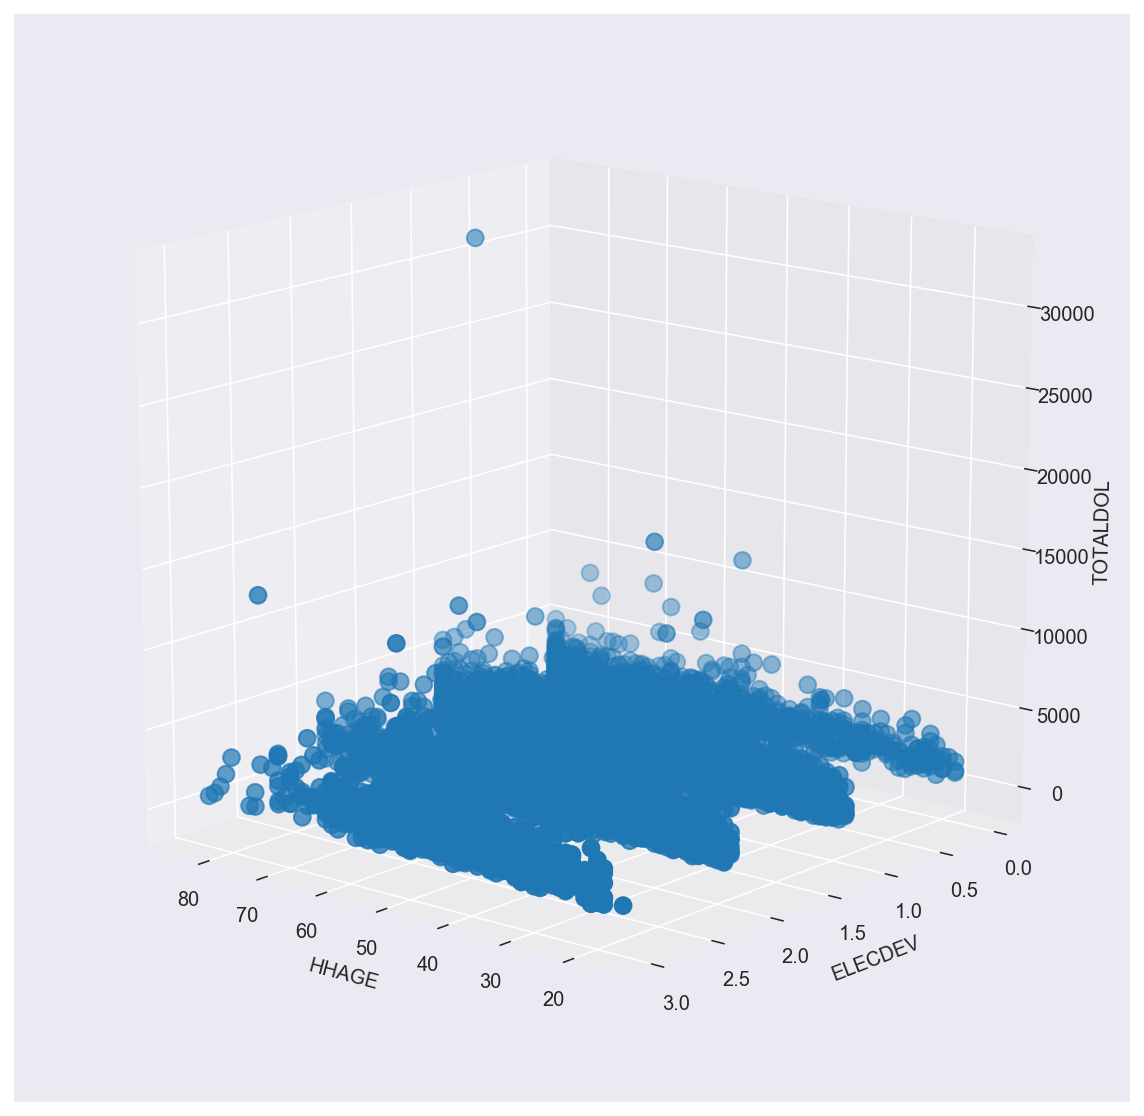

In [451]:
# using the full_model, look at the data in 3D to see if we can gain some intiution
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(energy_model['HHAGE'], energy_model['ELECDEV'], energy_model['TOTALDOL'], s=70)
ax.set(xlabel='HHAGE',ylabel="ELECDEV",zlabel="TOTALDOL")
ax.view_init(15, 130)
plt.draw()

In [452]:
ss = StandardScaler()
energy_model_s = ss.fit_transform(energy_model)

In [505]:
# look at PCA. Since the variance ratio are low, we're not able to use them in our clustering models. 
pca = PCA(n_components=3)
X3pca = pca.fit_transform(X3s)
pca.explained_variance_ratio_

array([ 0.09078662,  0.06310623,  0.05564444])

In [520]:
# try DBSCAN
dbscn = DBSCAN(eps =10 ,metric='euclidean', min_samples = 10).fit(X3pca)

In [521]:
labels = dbscn.labels_
print labels
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(energy_model_s, labels))

[0 0 0 ..., 0 0 0]
Silhouette Coefficient: 0.784


In [522]:
dbscn.core_sample_indices_

array([    0,     1,     2, ..., 12080, 12081, 12082])

In [523]:
# identify core samples
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscn.core_sample_indices_] = True
print(core_samples)

[ True  True  True ...,  True  True  True]


In [524]:
pcadf = pd. DataFrame(X3pca, columns=['PC1','PC2','PC3'])

In [525]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

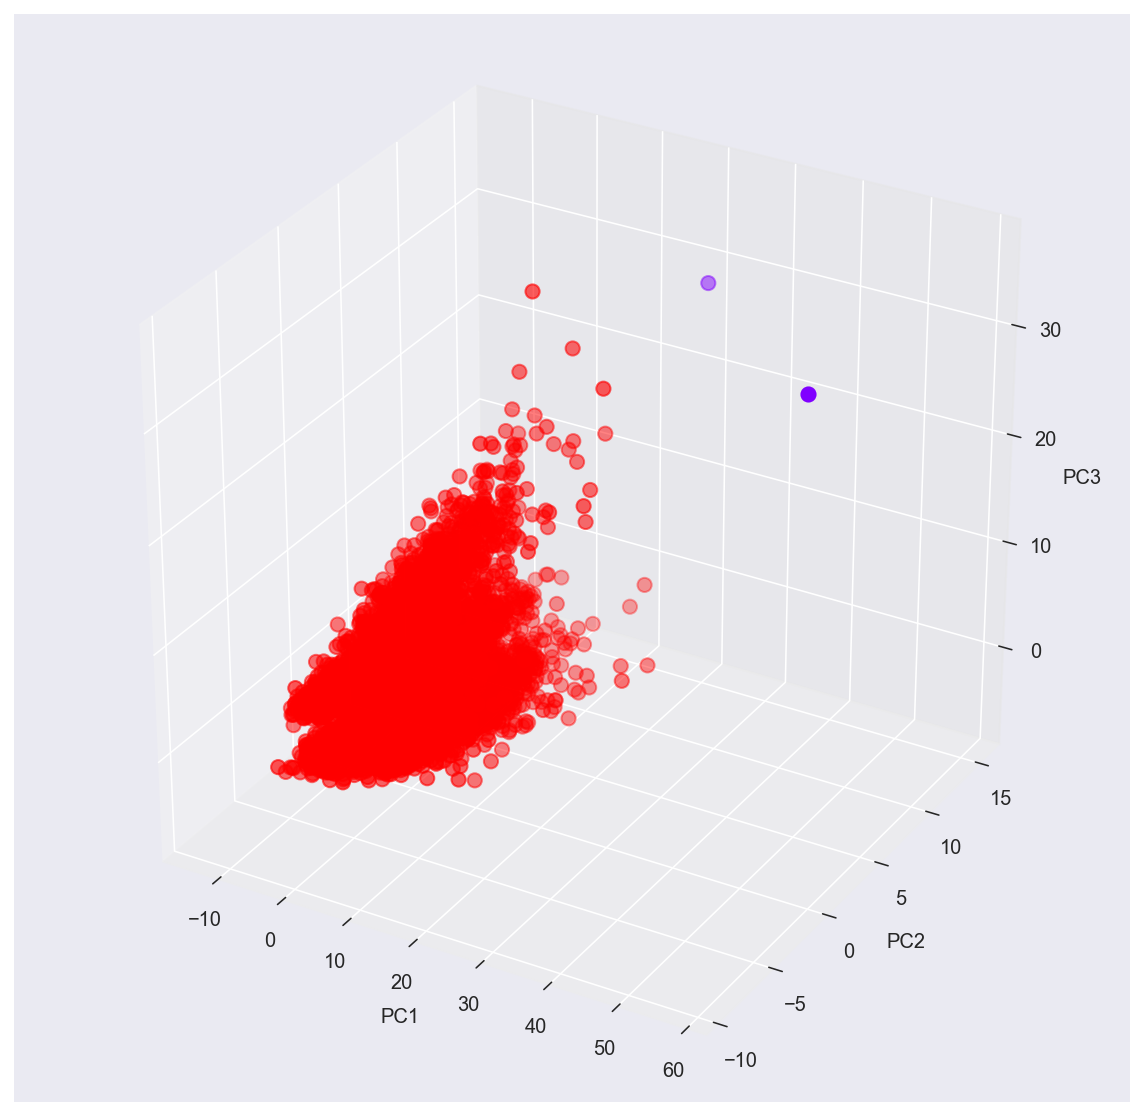

In [526]:
threedee = plt.figure(figsize=(10,10)).gca(projection='3d')
threedee.scatter(pcadf['PC1'], pcadf['PC2'], pcadf['PC3'], c=labels, s=50, cmap='rainbow')
threedee.set_xlabel('PC1')
threedee.set_ylabel('PC2')
threedee.set_zlabel('PC3')
plt.show()

In [517]:
# try KMeans 
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(energy_model_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [518]:
labels = model.labels_
centroids = model.cluster_centers_

print "Predicted clusters to points: ", labels
print "Location of centroids: "
print centroids

Predicted clusters to points:  [3 2 1 ..., 2 2 1]
Location of centroids: 
[[ -1.42584747e+00  -1.28236919e+00  -1.41745807e+00  -2.86850279e-01
   -2.77668183e-01   8.54532214e-01   2.57942187e-01   2.53503054e-01
   -8.60979553e-02  -1.07178930e-01   2.02067576e-01  -1.45420091e-01
    2.15088949e-01   4.46044787e-02  -8.19439927e-03   7.69873435e-02
   -7.03018749e-02   2.12112116e-01   1.15197234e-02   1.32053269e-01
    4.87087350e-02   1.48843882e-01   2.36791554e-02   1.67846814e-01
    5.72878615e-01  -7.84930154e-01   2.29236386e-01   1.89553103e-01
    1.15050286e-01   6.53006374e-02   3.93004545e-03   1.95770348e-01
   -2.50694862e-01   2.85183237e-01   5.70436824e-01  -1.58072840e-02
   -5.62690350e-02   2.42723276e-01   3.11143563e-01   2.85435915e-01
    1.59397800e-01   1.03576053e-01   1.97342766e-02   1.90608822e-01
    2.51088341e-01   3.50692189e-01   8.98255687e-02  -5.34371218e-02
   -1.22665008e-01  -1.27831074e-01   4.81786977e-02   5.59992158e-02
    3.42530681e-

In [519]:
# check how well K-means performs. The silhouette socre the inertia score are extremely bad. This is a poor clustering 
#model for the dataset

score = silhouette_score(energy_model_s, labels, metric='euclidean')
print score
model.inertia_

0.0611469794542


2291425.7700427808

### Now try another age range for comparison

In [571]:
# Set up X and y
X3 = energy_model.drop('HHAGE', axis=1)
z3 = pd.Series(np.where(np.logical_and(energy_model['HHAGE']>=40, energy_model['HHAGE']<=60),1,0))
print "number of 40-60 years of age respondents:", z3.sum(), 'length of dataframe: ', len(z3)

number of 40-60 years of age respondents: 5125 length of dataframe:  12083


In [572]:
# train test split using Sandardized X3

X3s_train, X3s_test, z3_train, z3_test = train_test_split(X3s, z3, test_size=0.20, random_state=42)

In [573]:
## convert cell to code to run
# Do a quick search over a variety of classification models
models = []
models.append(('LOR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFRST', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('SVM', SVC()))
models.append(('LSVM', LinearSVC()))


# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold()
    cv_results = cross_val_score(model, X3s_train, z3_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LOR: 0.672564 (0.002741)
KNN: 0.584006 (0.003365)
CART: 0.615974 (0.002638)
RFRST: 0.626423 (0.008329)
GB: 0.694393 (0.005257)
ADA: 0.679081 (0.001541)
SVM: 0.676909 (0.002682)
LSVM: 0.671943 (0.004693)


In [574]:
#baseline of the 40-60 range
max(np.mean(z3), 1-np.mean(z3))

0.5758503682860217

In [575]:
## convert cell to code to run
# Logistic Regression and Gradient Boosting both seems fairly well. For the sake of consistency, let's run 
#logistic regression on this smaller set of data

cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

LOR3z = LogisticRegression()

params = {'penalty': ['l1', 'l2'], 'C':np.logspace(-5,0,100)}
gs = GridSearchCV(LOR, param_grid=params, cv=cv)
gs.fit(X3s_train, z3_train)

print gs.best_params_ 
print gs.best_score_

{'penalty': 'l1', 'C': 0.019179102616724886}
0.684564452721


In [576]:
## convert cell to code to run
# make predictions on the test set
print gs.best_estimator_.score(X3s_test, z3_test) 
y_pred = gs.best_estimator_.predict(X3s_test) 
y_pred_prob = gs.best_estimator_.predict_proba(X3s_test)

0.681836988002


In [579]:
#cross validate on the best parameters
LOR_finalz3 = LogisticRegression(penalty='l1', C=0.019179102616724886, random_state=42)
LOR_finalz3.fit(X3s_train, z3_train)
scores=cross_val_score(LOR_finalz3, X3s_test, z3_test, cv=10)
print scores
print np.mean(scores)



[ 0.64609053  0.70781893  0.69547325  0.69008264  0.65145228  0.59751037
  0.68879668  0.63900415  0.65560166  0.65560166]
0.662743216566


In [580]:
# zip together coefficients from the Logistic Regression model and its column names 
pd.DataFrame(LOR_finalz3.coef_, columns=X3.columns).T[0].sort_values(ascending=False)[:20] 
#sort_value is a string function, therefore we need to slice T[0] to sort it. 

WORKPAY         0.197474
SSINCOME        0.138094
HEATROOM        0.137014
TOTALDOLOTH     0.130757
MONEYPY         0.120538
INSTLWS         0.105179
PCONOFF3        0.070603
RGLRPAY         0.059161
OUTGRILLFUEL    0.048232
WHEATBKT        0.045333
WINDOWS         0.044507
NUMCFAN         0.043575
LPGDELV         0.039600
WWACAGE         0.030095
SOLWATER        0.028616
PUGCOOK         0.028606
REPLCHT         0.027116
EQUIPAGE        0.026496
AGEWS           0.026084
CORDSWD         0.022601
Name: 0, dtype: float64

In [581]:
# look at absolute value to see what is strongly negatively correlated
LOR_results = pd.DataFrame(LOR_finalz3.coef_, columns=X3.columns).T[0].apply(lambda x: abs(x)).sort_values(ascending=False)
LOR_results[:20]

RETIREPY        0.671696
WORKPAY         0.197474
KOWNRENT        0.167141
SSINCOME        0.138094
HEATROOM        0.137014
MOISTURE        0.135144
TOTALDOLOTH     0.130757
MONEYPY         0.120538
INSTLWS         0.105179
NHSLDMEM        0.098301
PCONOFF3        0.070603
EDUCATION       0.061688
TEMPHOME        0.061147
RGLRPAY         0.059161
OUTGRILLFUEL    0.048232
WHEATBKT        0.045333
WINDOWS         0.044507
NUMCFAN         0.043575
NEWGLASS        0.041444
LPGDELV         0.039600
Name: 0, dtype: float64

In [582]:
## convert cell to code to run
# Try Gradient Boosting Classifier on the energy dataset
GB = GradientBoostingClassifier()
GB_params = {"max_depth" : [3, 5, 10],
              'min_samples_split': [2, 5, 10],
              "n_estimators": [10, 25], 'learning_rate':[.1]}

gs_GB = GridSearchCV(GB, param_grid=GB_params, verbose=1, cv=cv)
gs_GB.fit(X3s_train,z3_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  5.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 5, 10], 'n_estimators': [10, 25], 'learning_rate': [0.1], 'max_depth': [3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [583]:
## convert cell to code to run
print "Intrepret the results"
"Grid Search best score is {} and best parameters are {}".format(gs_GB.best_score_,gs_GB.best_params_)

Intrepret the results


"Grid Search best score is 0.698220566936 and best parameters are {'min_samples_split': 5, 'n_estimators': 25, 'learning_rate': 0.1, 'max_depth': 5}"

In [584]:
GB_final3 = GradientBoostingClassifier(learning_rate=.1, max_depth=5, min_samples_split=5, n_estimators=25)
GB_final3.fit(X3s_train, z3_train)
GB_final3.score(X3s_test, z3_test)

0.69466280513032685

# Summary 